In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Figure 4a

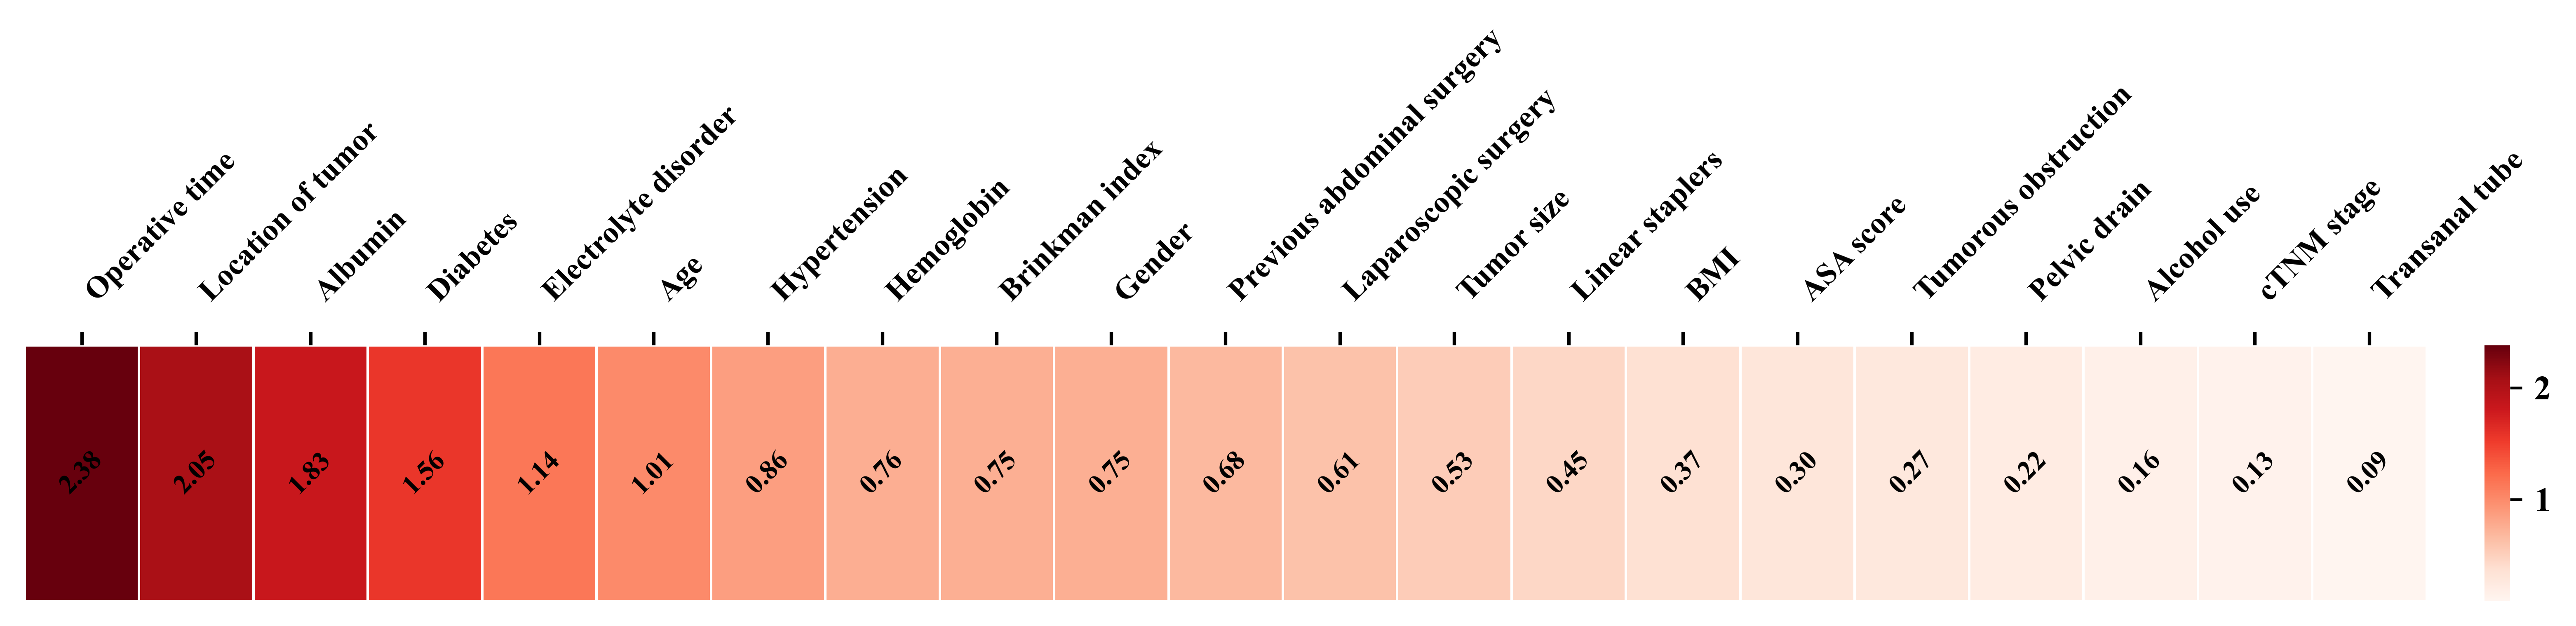

In [6]:
labels = ['Transanal tube', 'cTNM stage', 'Alcohol use', 'Pelvic drain', 'Tumorous obstruction',
          'ASA score', 'BMI', 'Linear staplers', 'Tumor size', 'Laparoscopic surgery',
          'Previous abdominal surgery', 'Brinkman index', 'Gender', 'Hemoglobin',
          'Hypertension', 'Age', 'Electrolyte disorder', 'Diabetes', 'Albumin', 
          'Location of tumor', 'Operative time']
values = [0.09, 0.13, 0.16, 0.22, 0.27, 0.30, 0.37, 0.45, 0.53, 0.61,
          0.68, 0.75, 0.75, 0.76, 0.86, 1.01, 1.14, 1.56, 1.83, 2.05, 2.38]

df = pd.DataFrame({'Variable': labels, 'Value': values})
df = df.sort_values('Value', ascending=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.weight"] = "bold"
plt.figure(figsize=(12, 2.8), dpi=600)  
heatmap = sns.heatmap(
    df['Value'].values.reshape(1, -1), 
    annot=True,
    annot_kws={"size":8, "weight": "bold", "rotation": 45, "fontstyle": "normal", "color": "black"},
    fmt=".2f",
    yticklabels=[''], 
    xticklabels=['']*len(df),  
    cmap='Reds',
    cbar_kws={"pad": 0.02, "shrink": 1, "aspect": 10, "location": "right"},
    linewidths=0.5
)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')  
ax.tick_params(
    axis='x',
    which='both',
    bottom=False,      
    top=True,          
    length=4,         
    width=1,           
    color='black'     
)
for i, var in enumerate(df['Variable']):
    ax.text(
        x=i + 0.5,        
        y=1.15,             
        s=var,              
        rotation=45,
        ha='left',         
        va='bottom',       
        fontsize=9,
        transform=ax.get_xaxis_transform()
    )
ax.set_yticks([])

plt.tight_layout()
plt.show()

Figure 4b

In [13]:
df = pd.read_excel(r"alldata.xlsx")

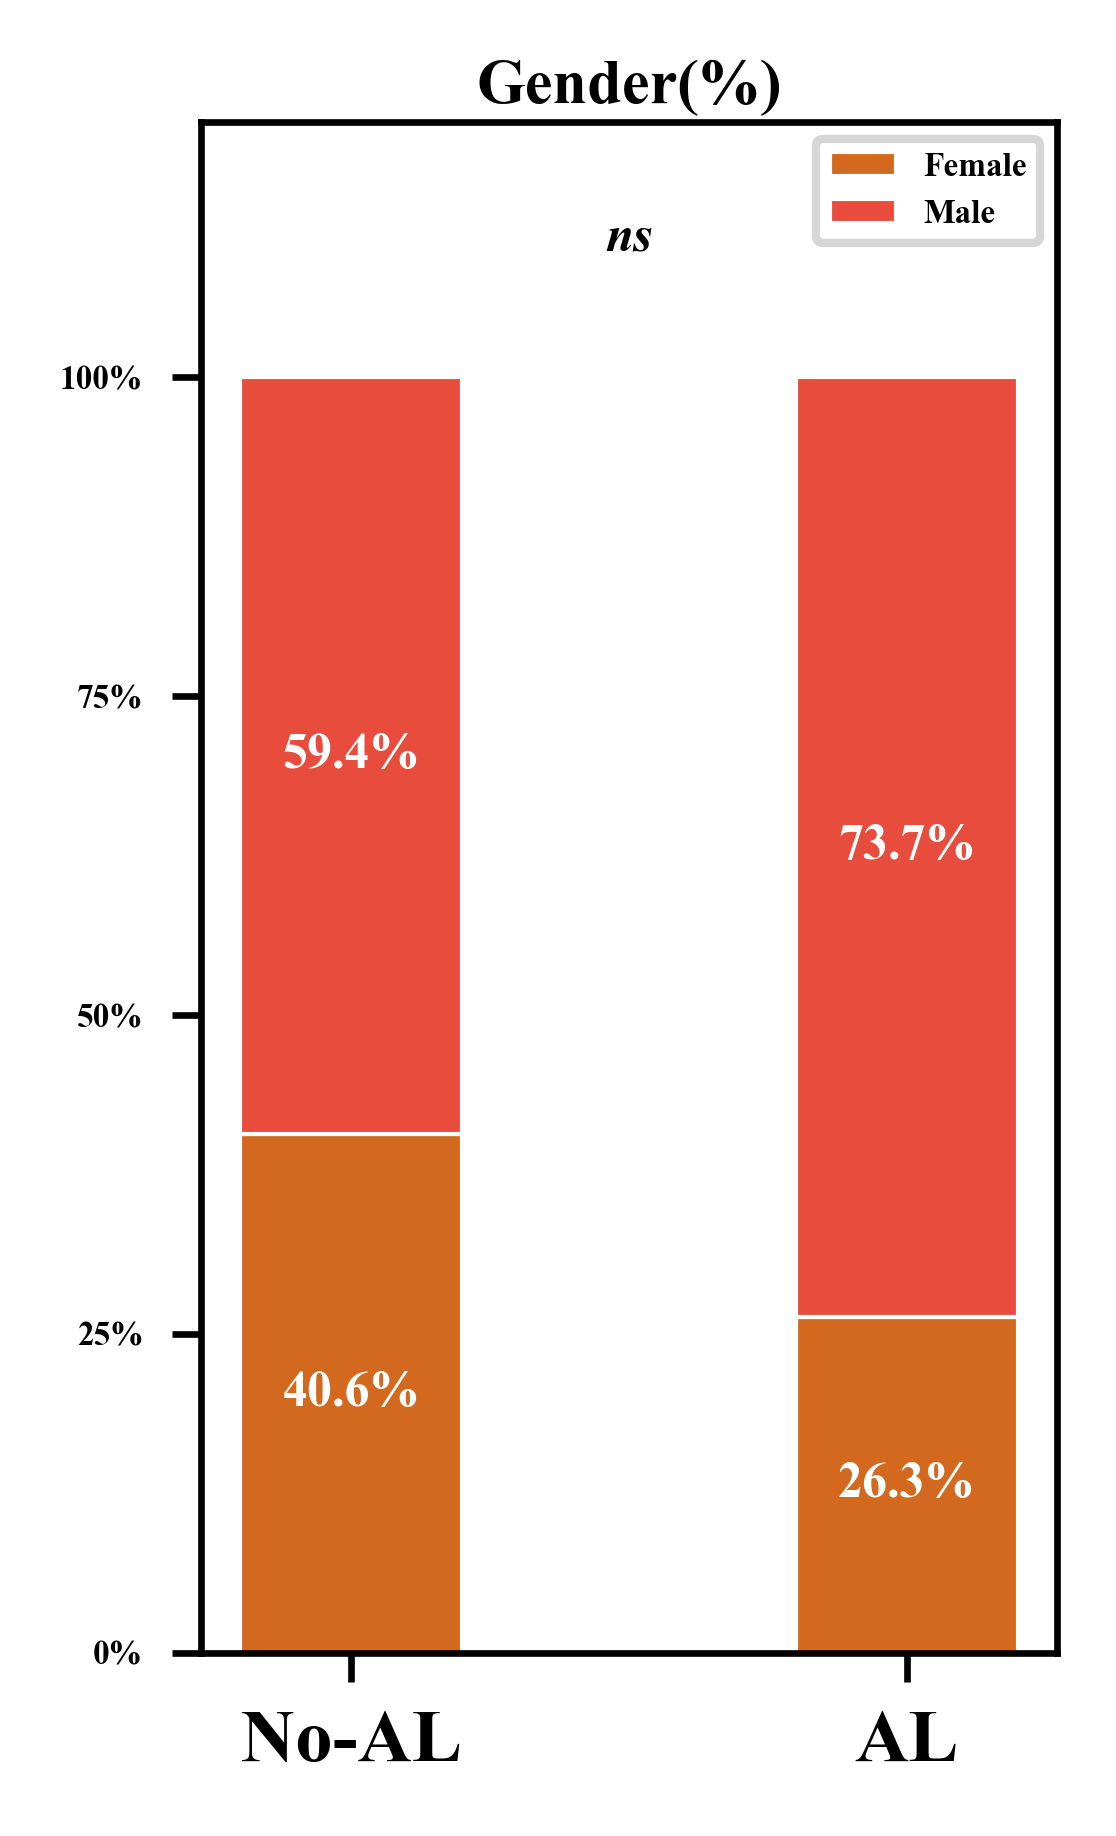

In [11]:
grouped = df.groupby(['al'])['gender'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  # 蓝色
female_color = '#e74c3c'  # 红色
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Female', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='Male', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')

plt.title('Gender(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

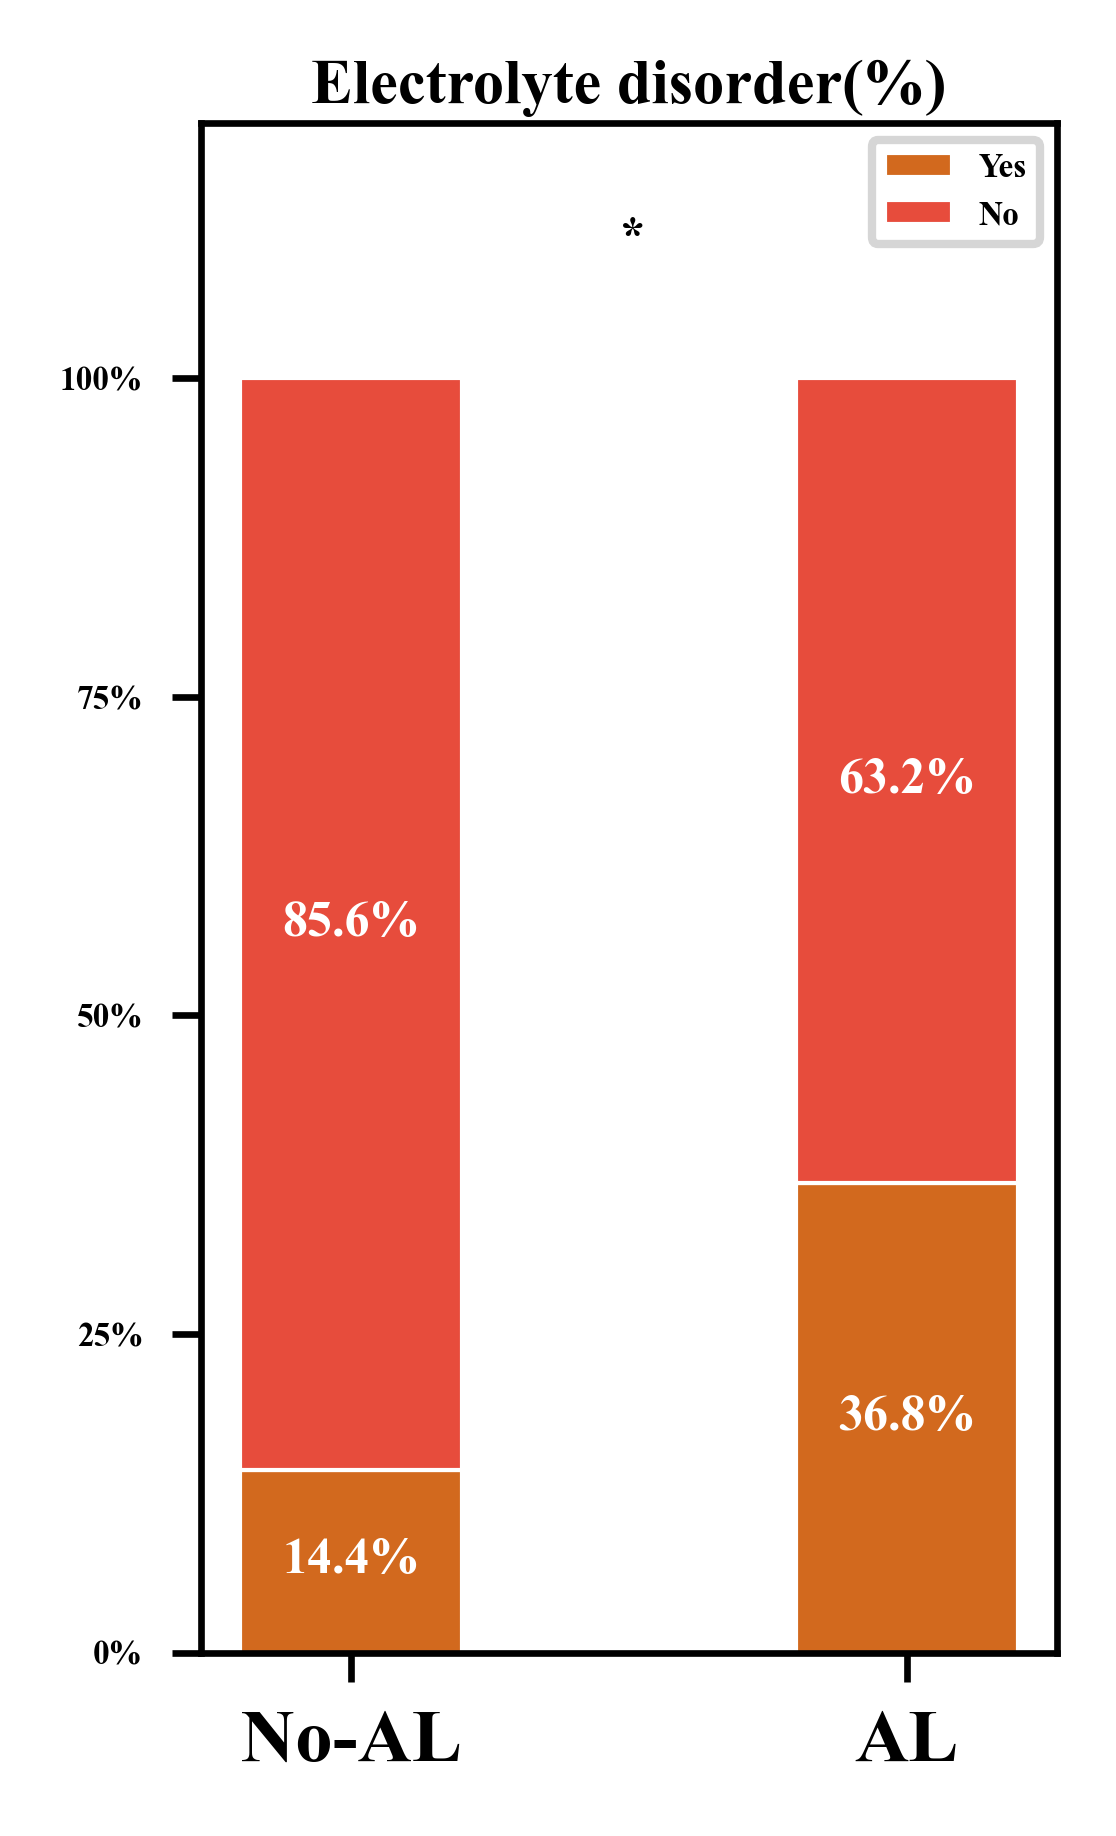

In [15]:
grouped = df.groupby(['al'])['electrolyte'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Electrolyte disorder(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'*', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

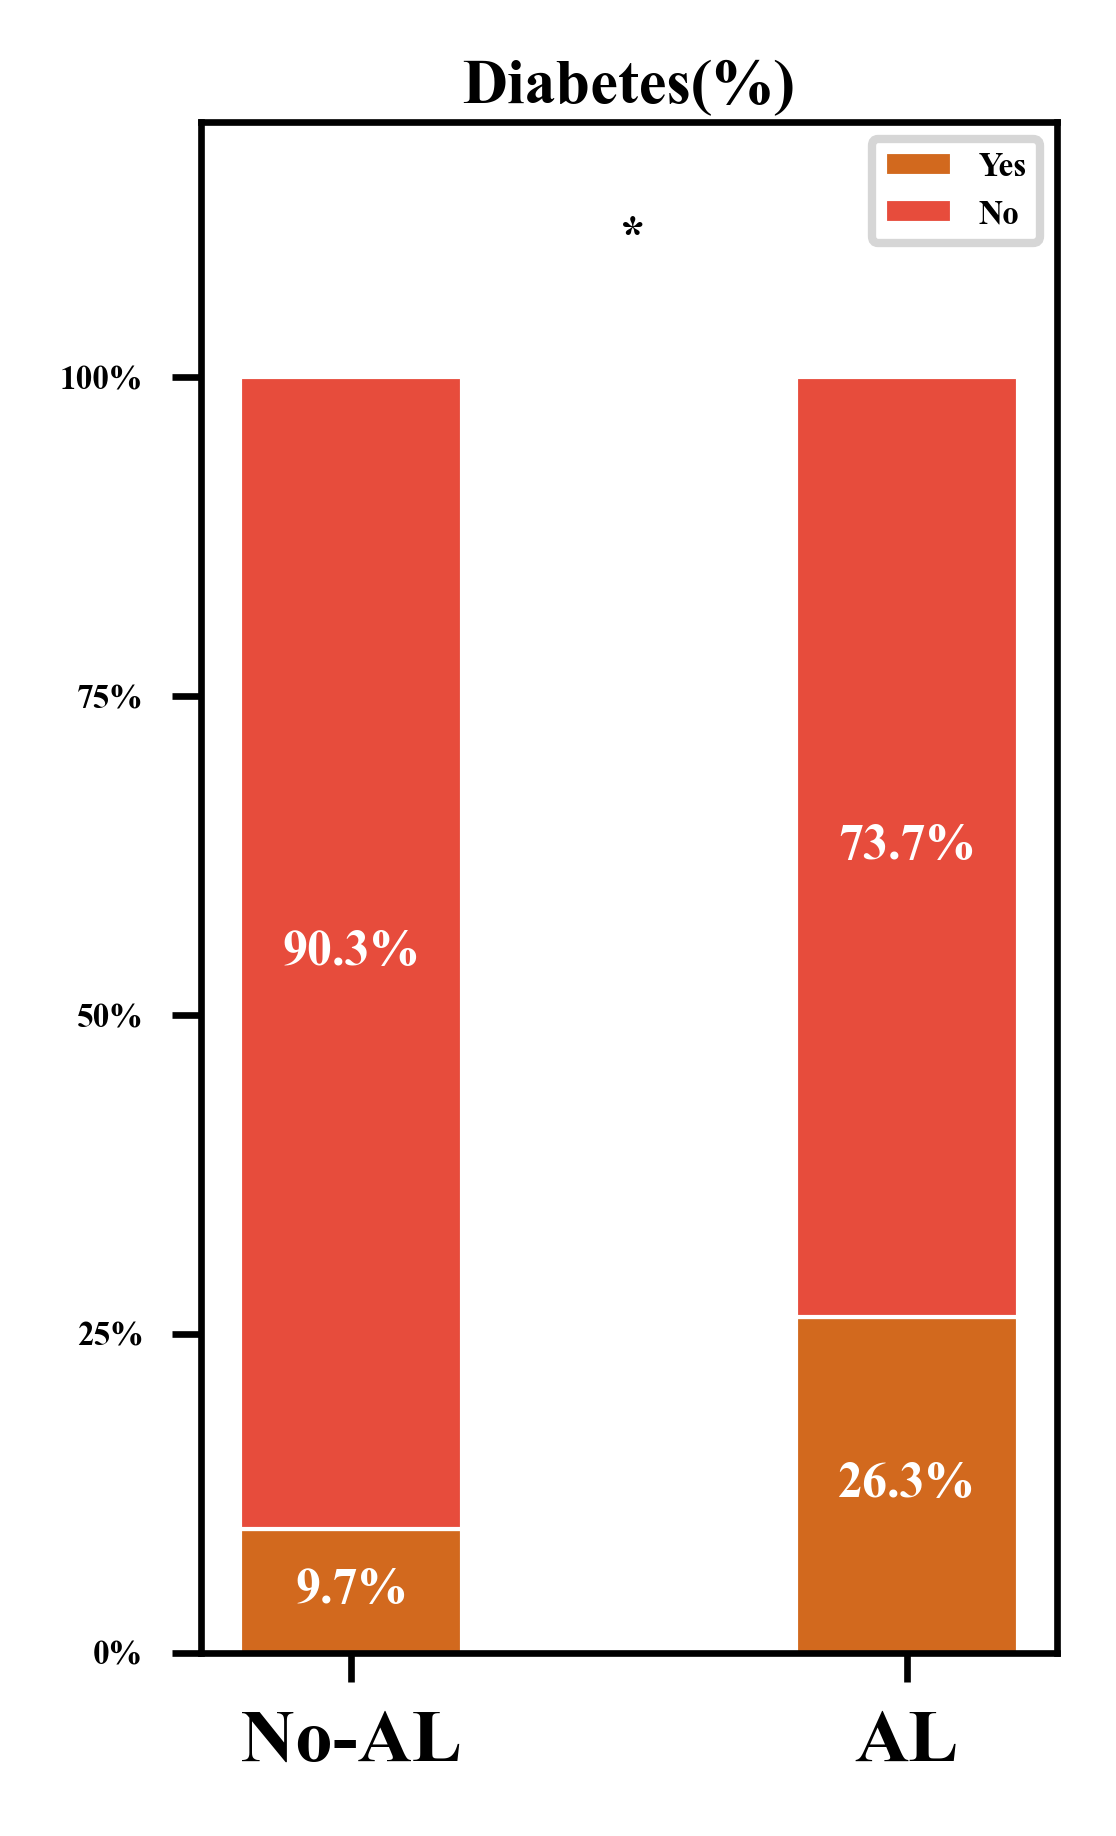

In [17]:
grouped = df.groupby(['al'])['dia'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)

plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Diabetes(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'*', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

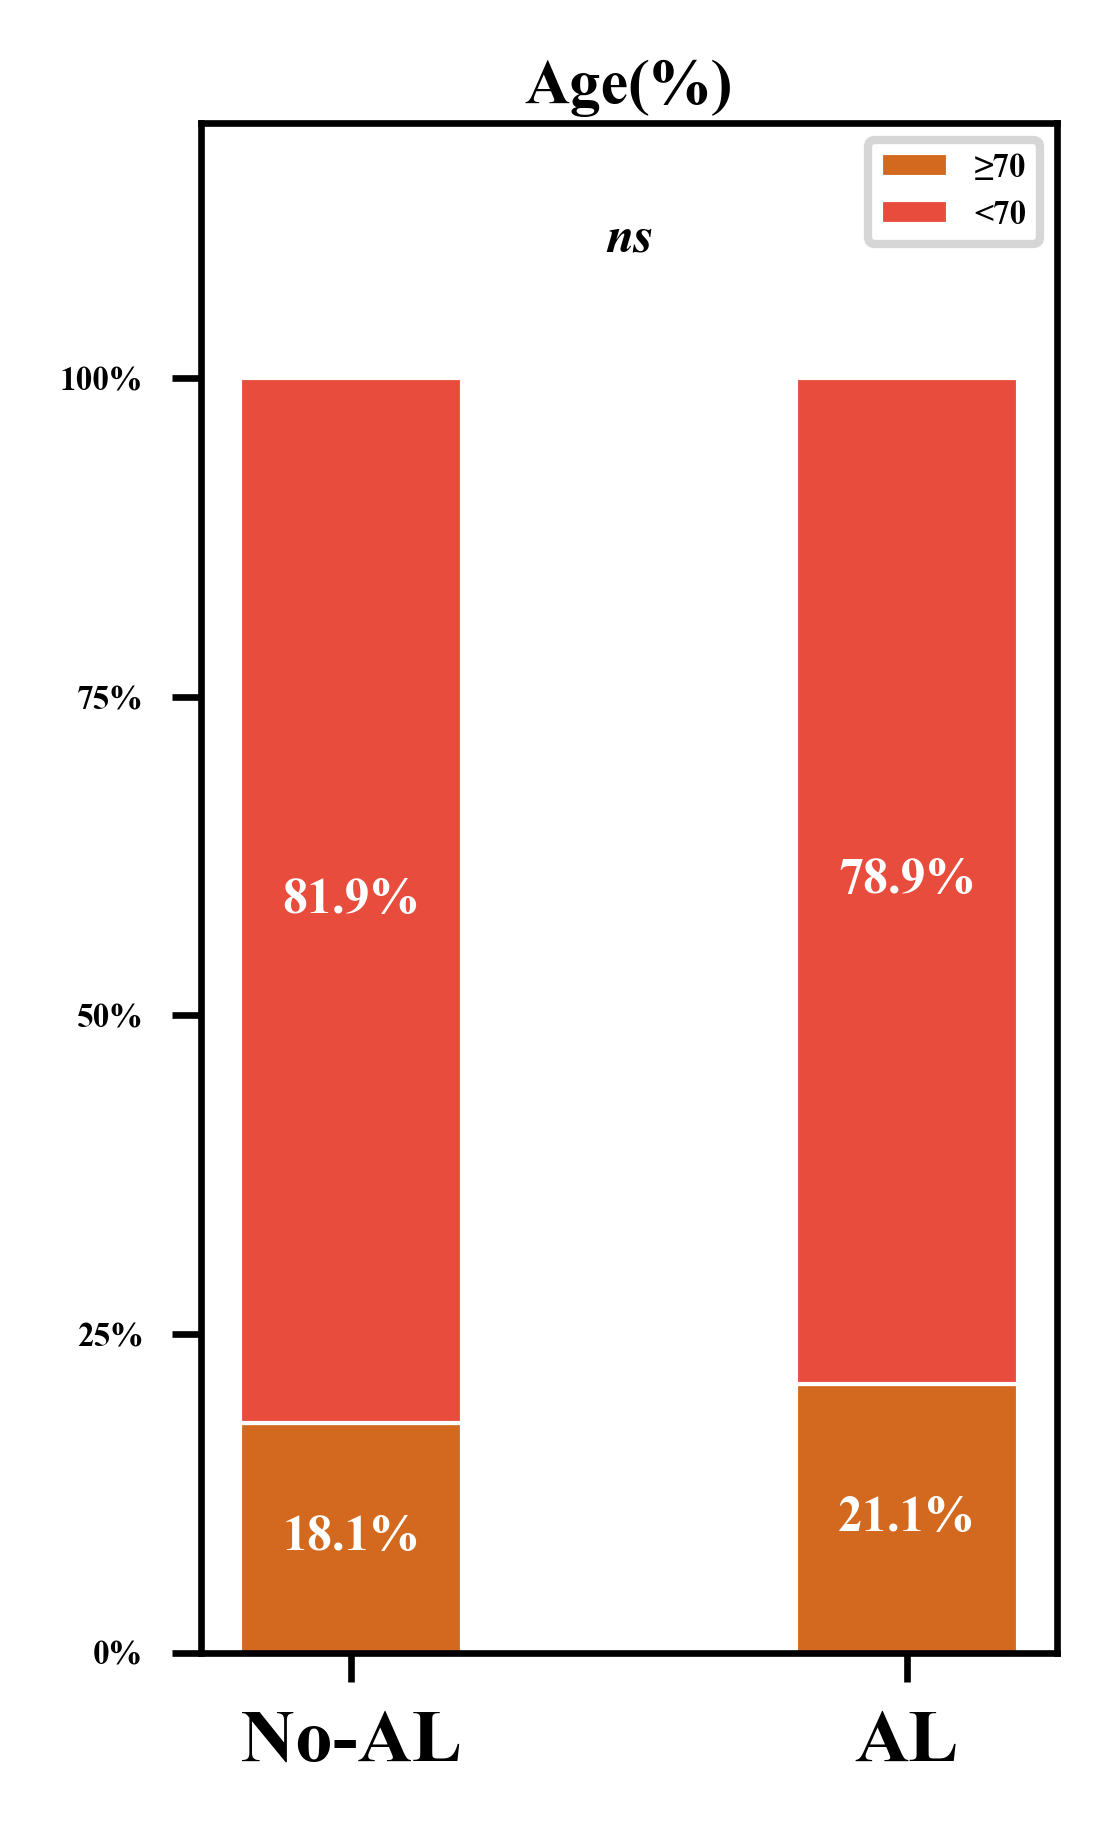

In [19]:
grouped = df.groupby(['al'])['agebz'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='≥70', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='<70', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Age(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

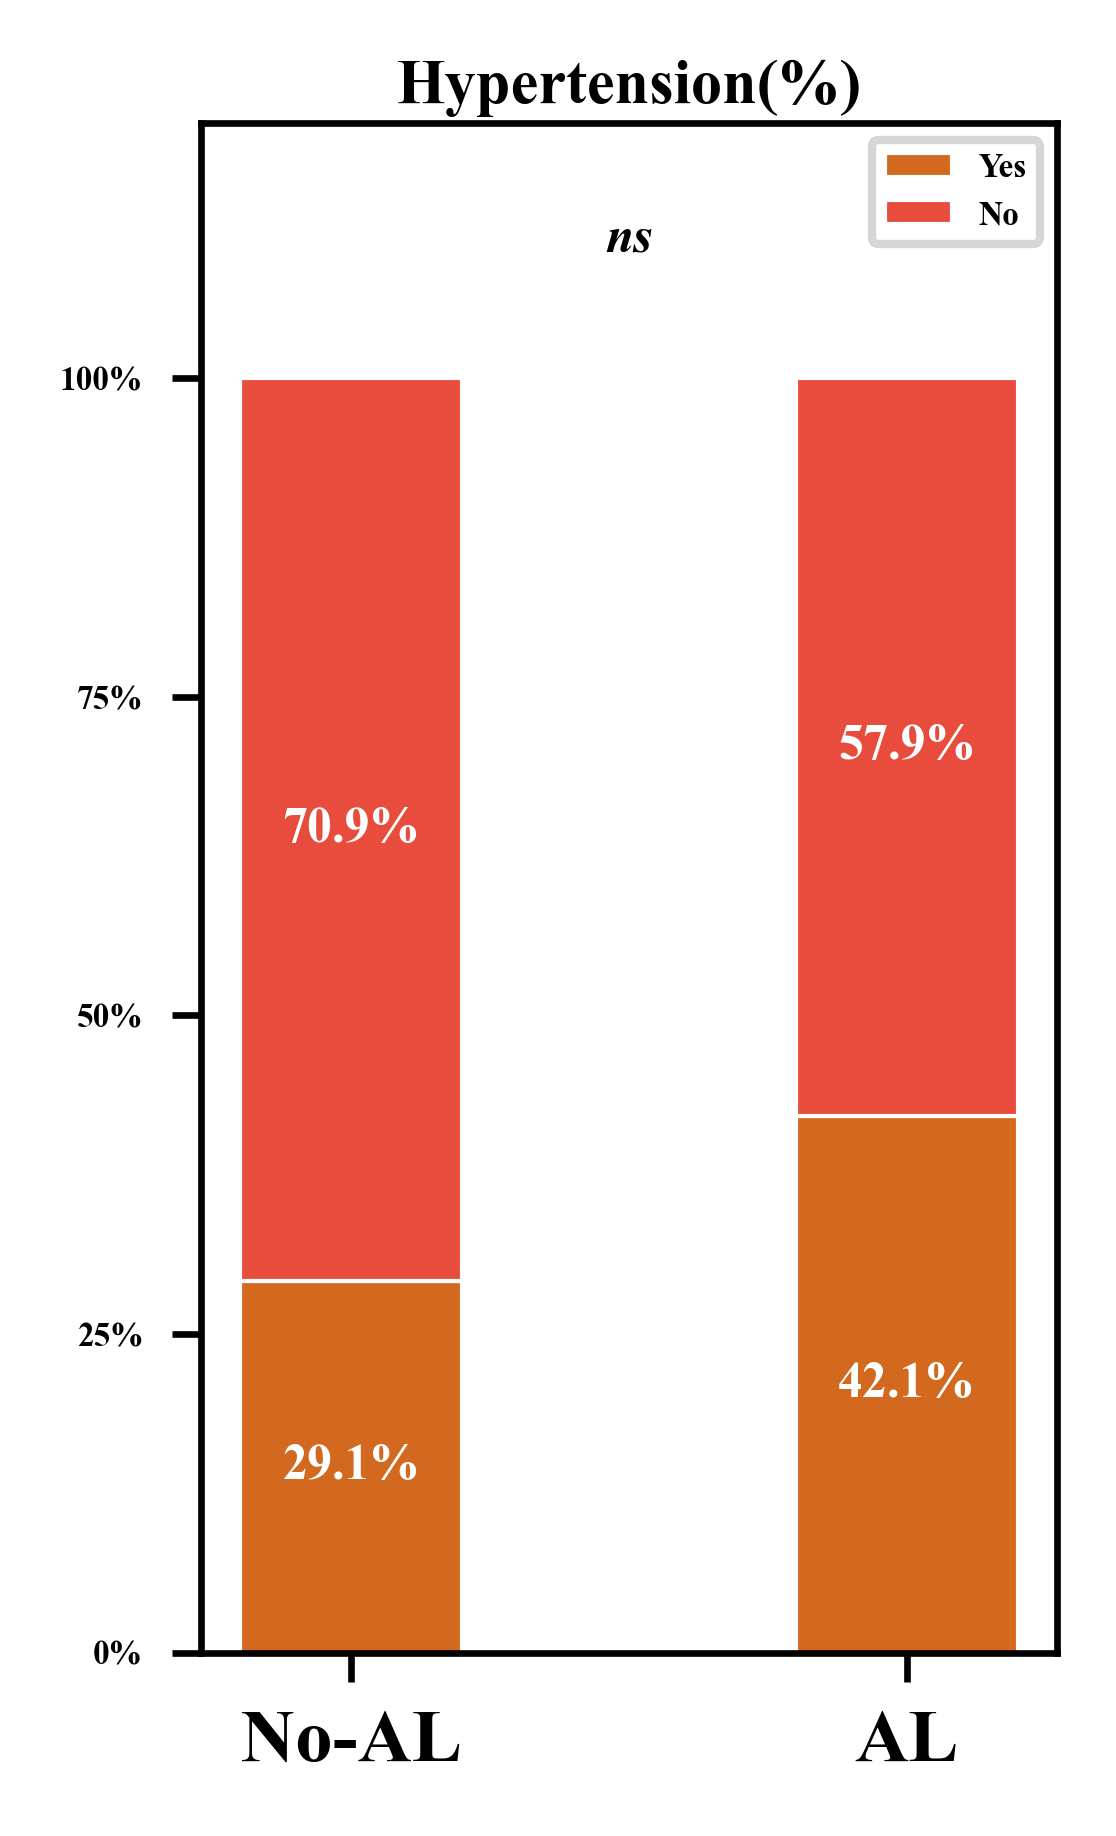

In [21]:
grouped = df.groupby(['al'])['hyper'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Hypertension(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

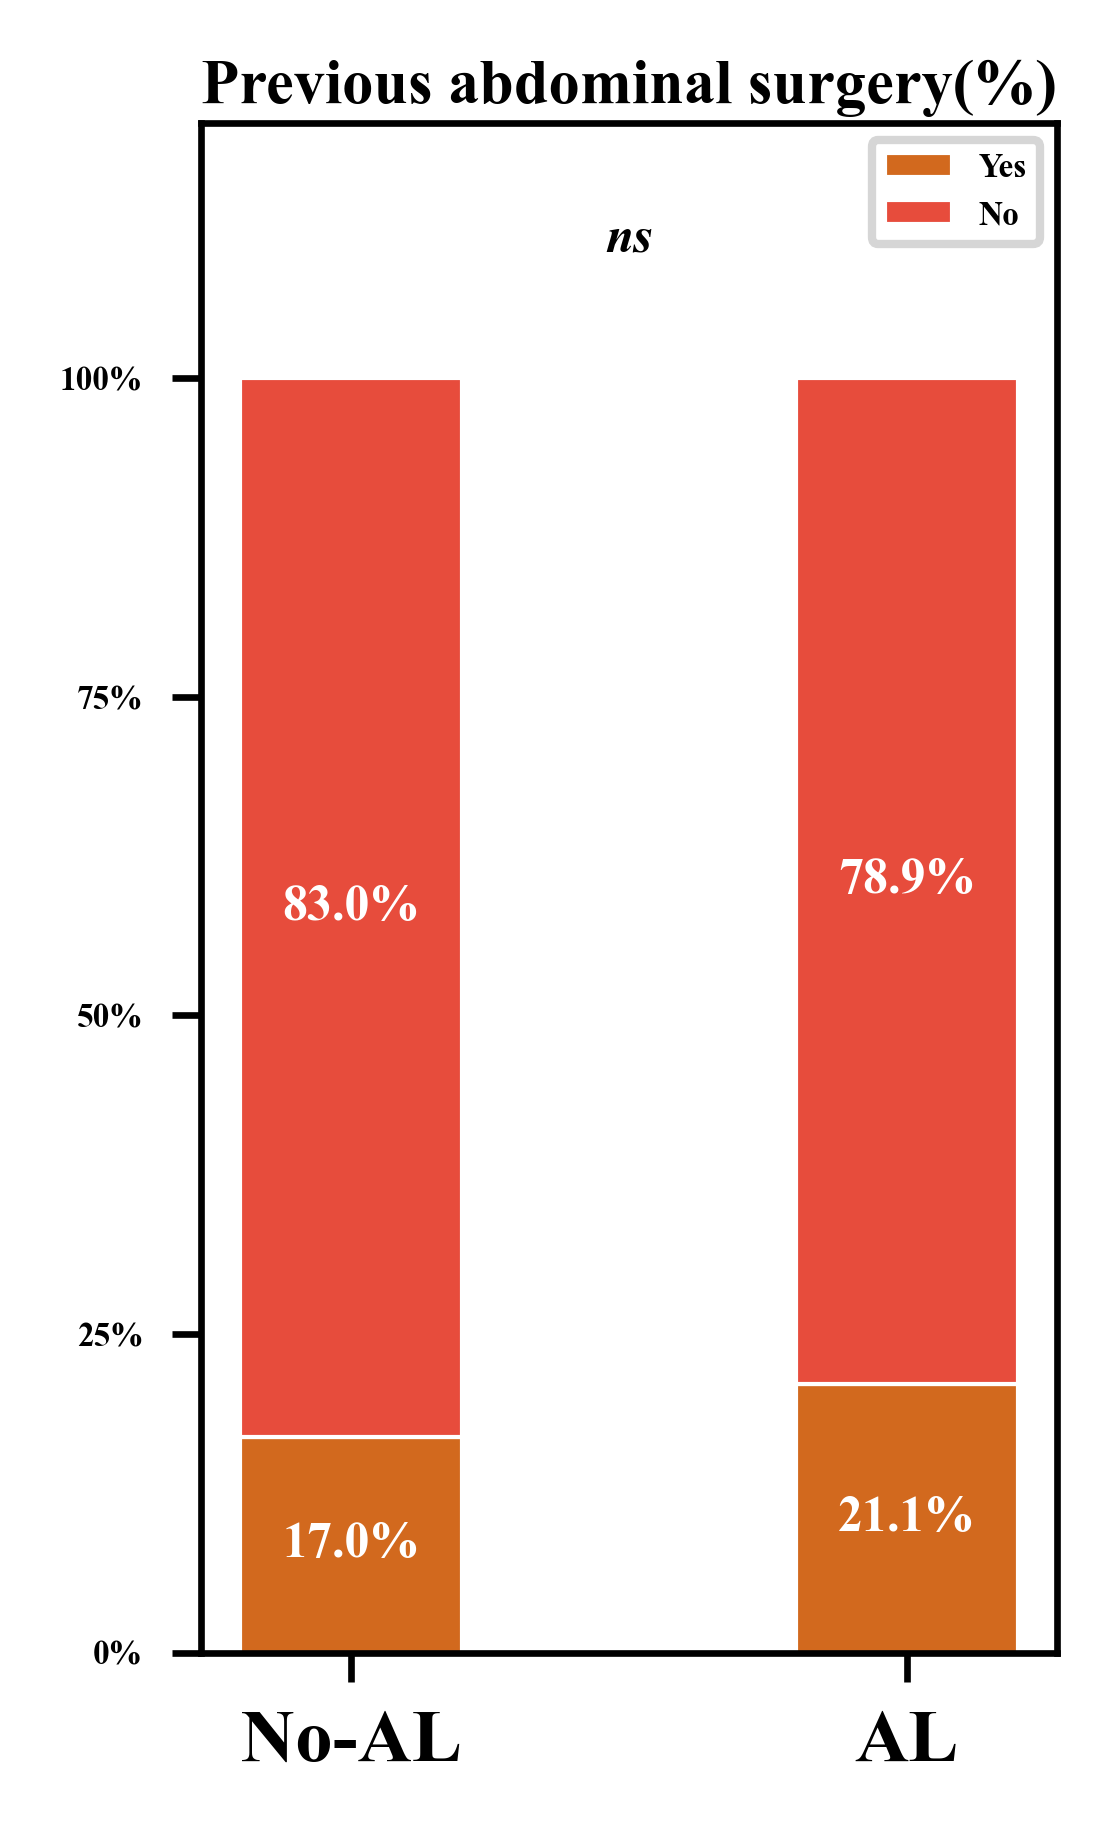

In [23]:
grouped = df.groupby(['al'])['sur'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)

plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)

plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Previous abdominal surgery(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

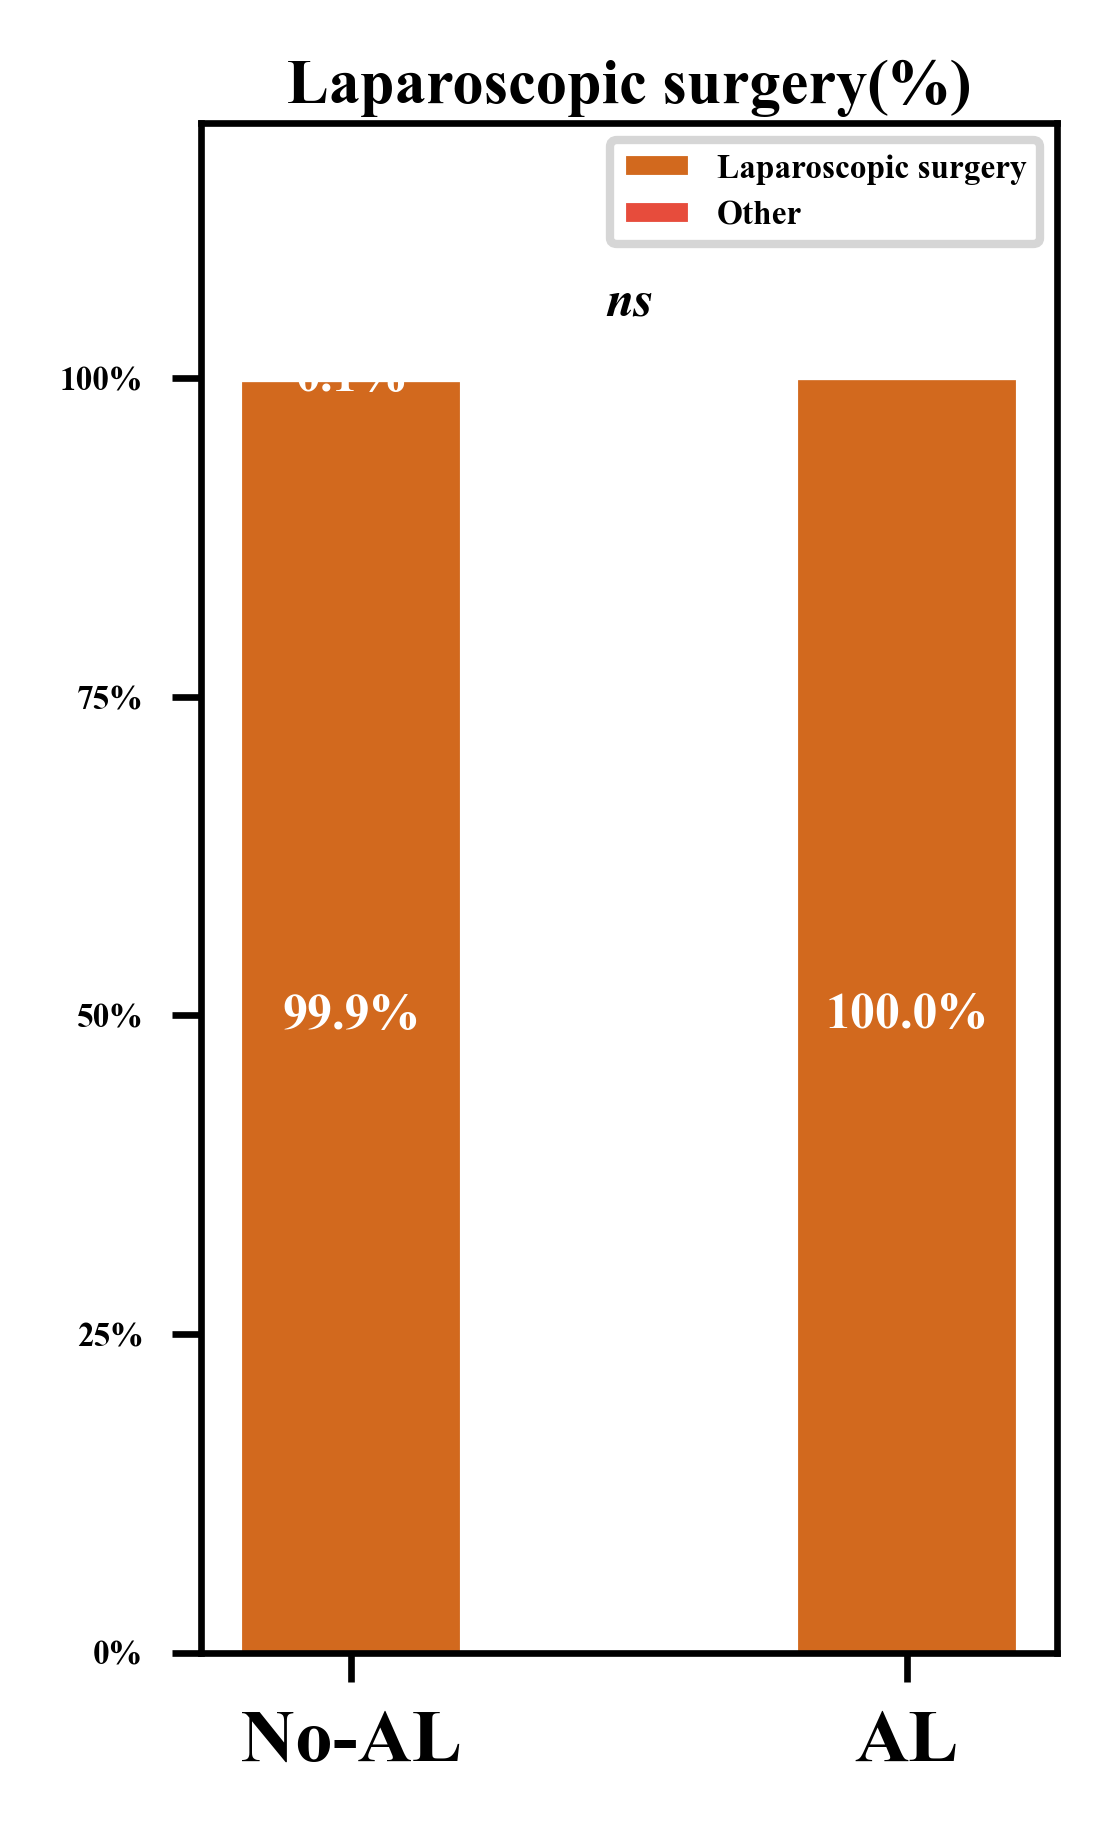

In [25]:
grouped = df.groupby(['al'])['type'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate' 
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Laparoscopic surgery', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='Other', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Laparoscopic surgery(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.05,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

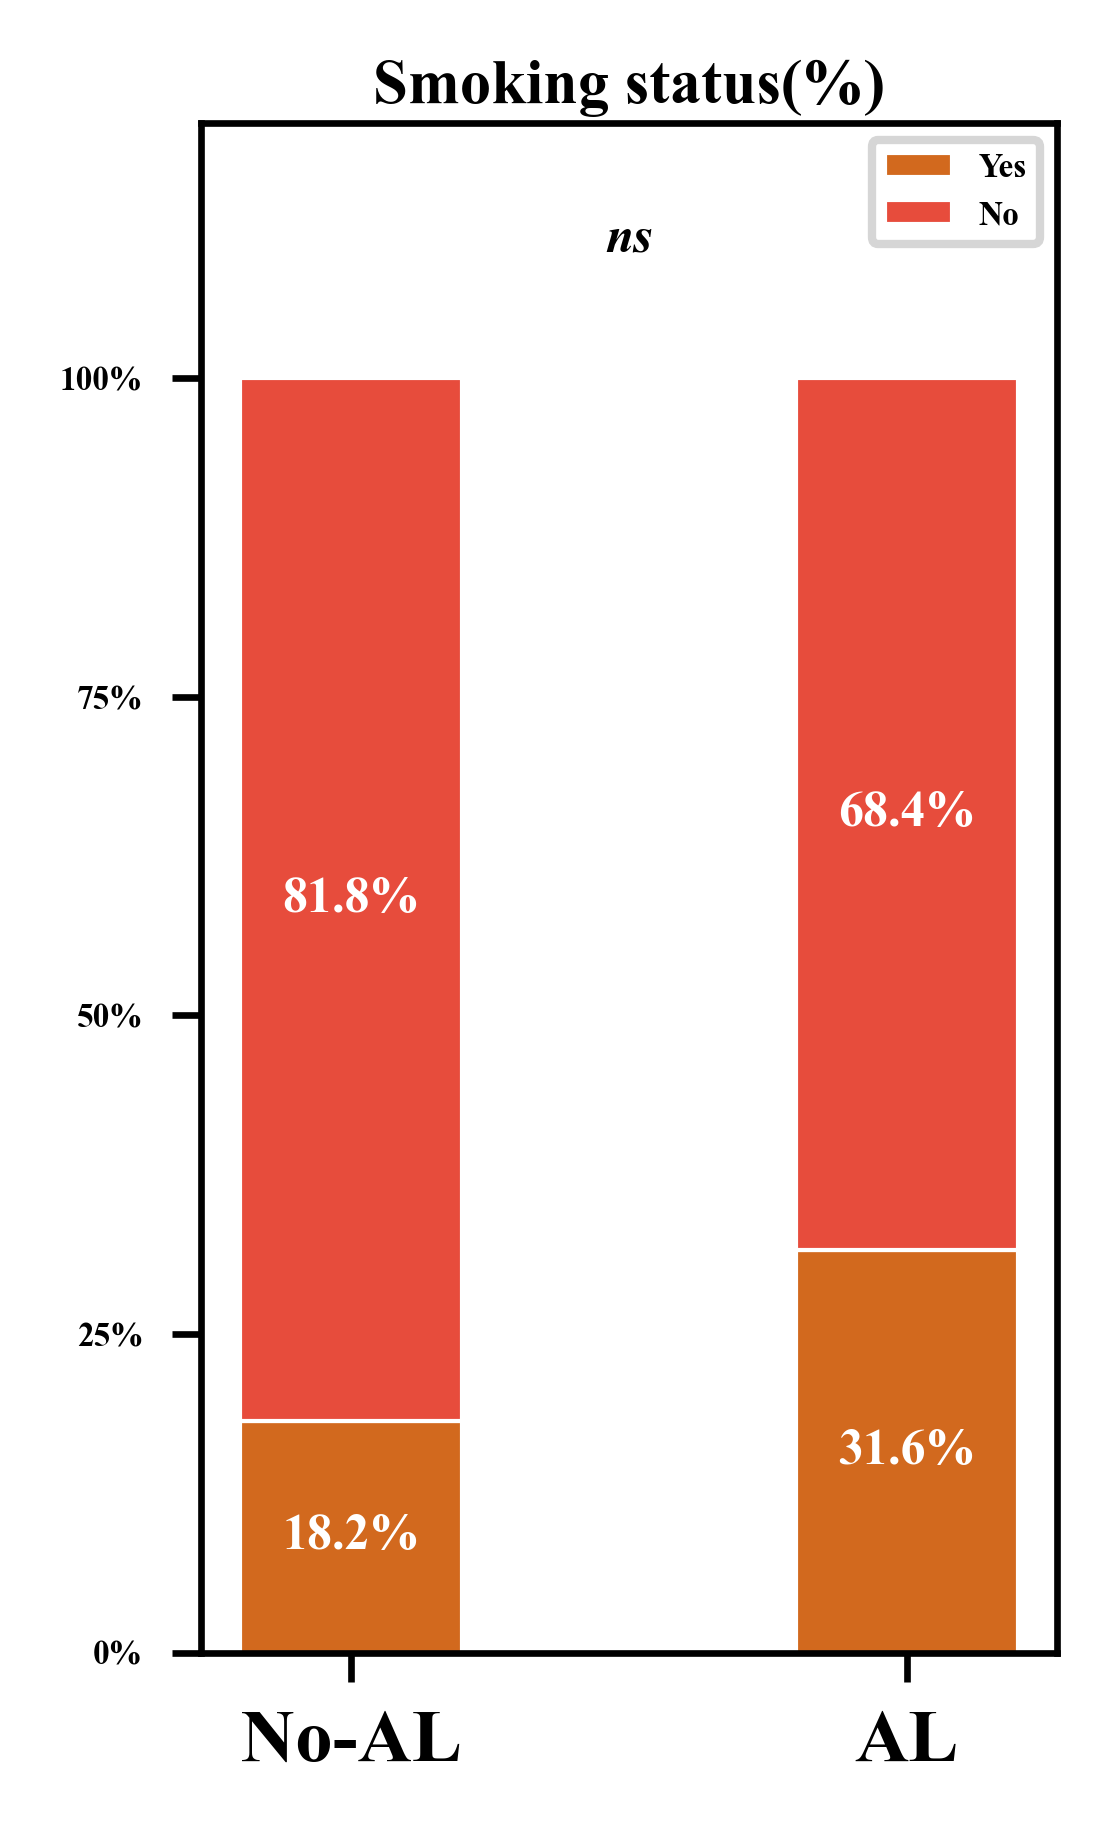

In [27]:
grouped = df.groupby(['al'])['smoke'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')

plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Smoking status(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

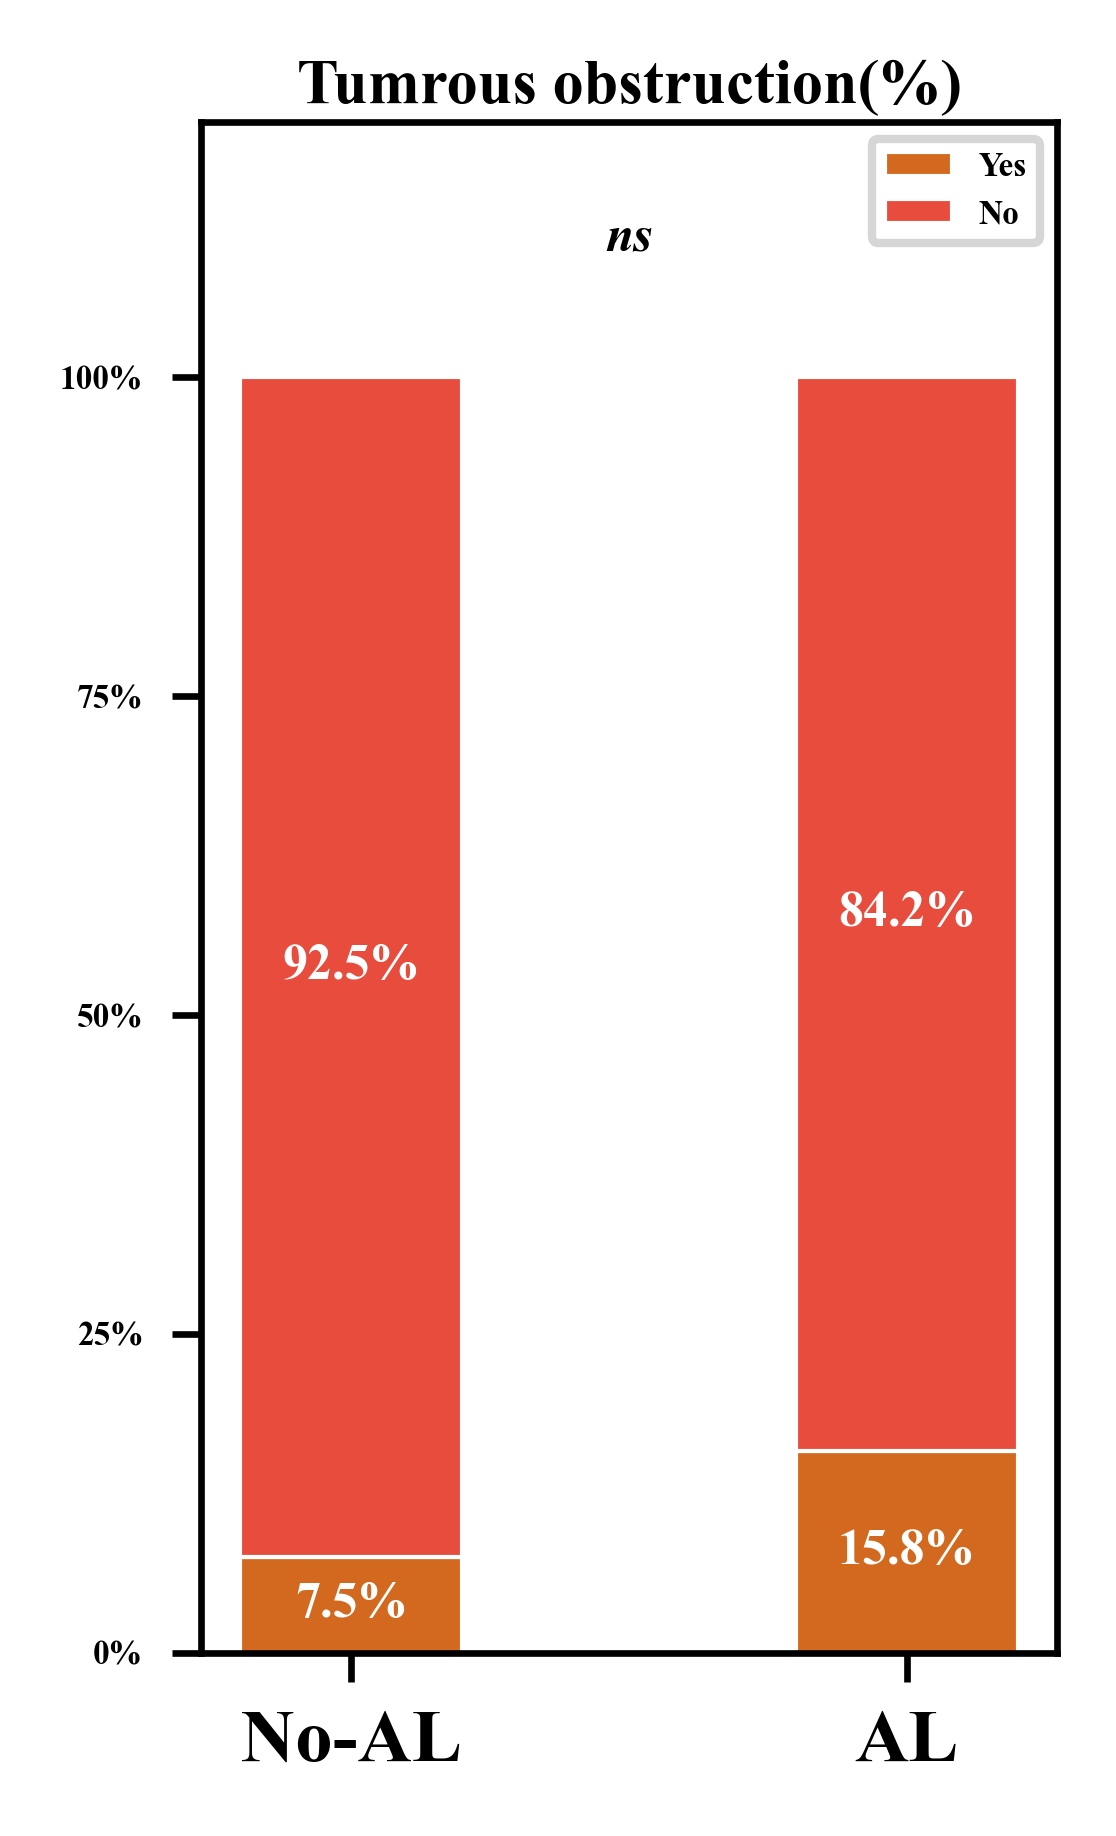

In [29]:
grouped = df.groupby(['al'])['obstruction'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c' 
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Tumrous obstruction(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

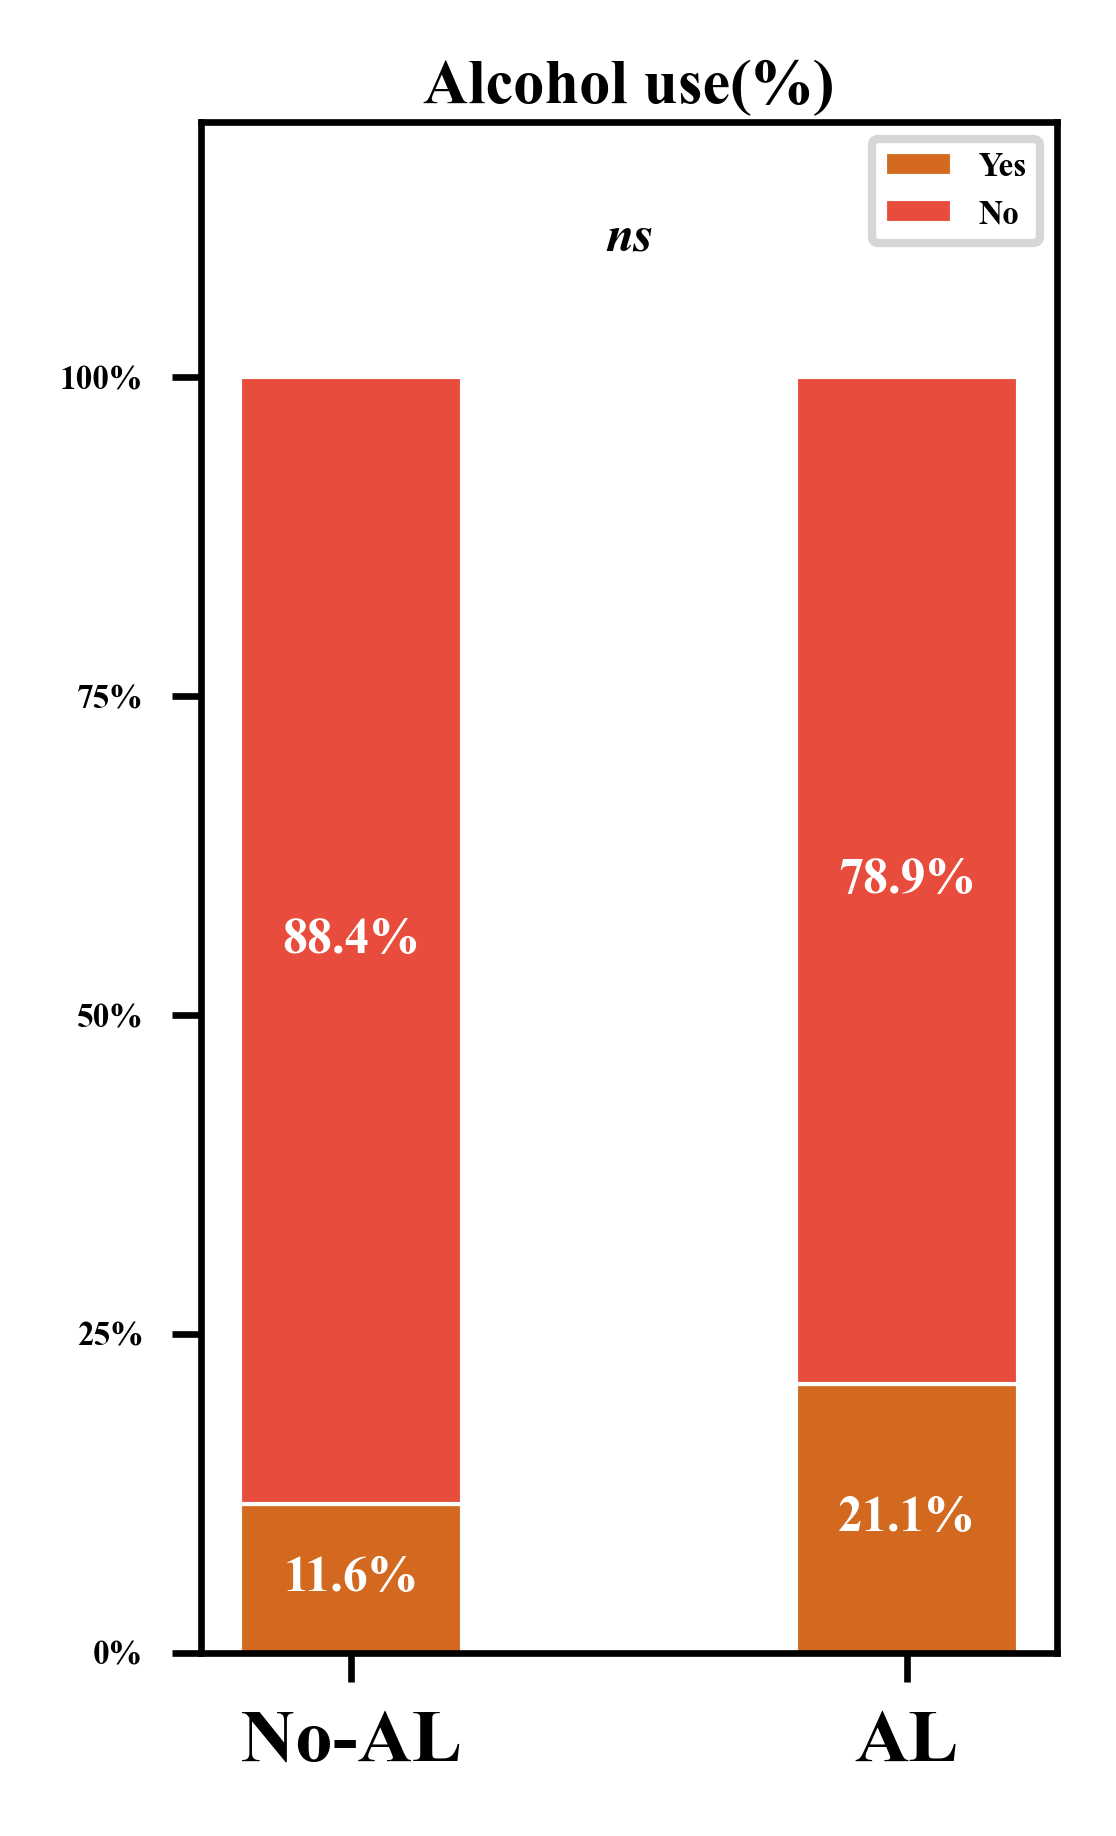

In [31]:
grouped = df.groupby(['al'])['drink'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Alcohol use(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

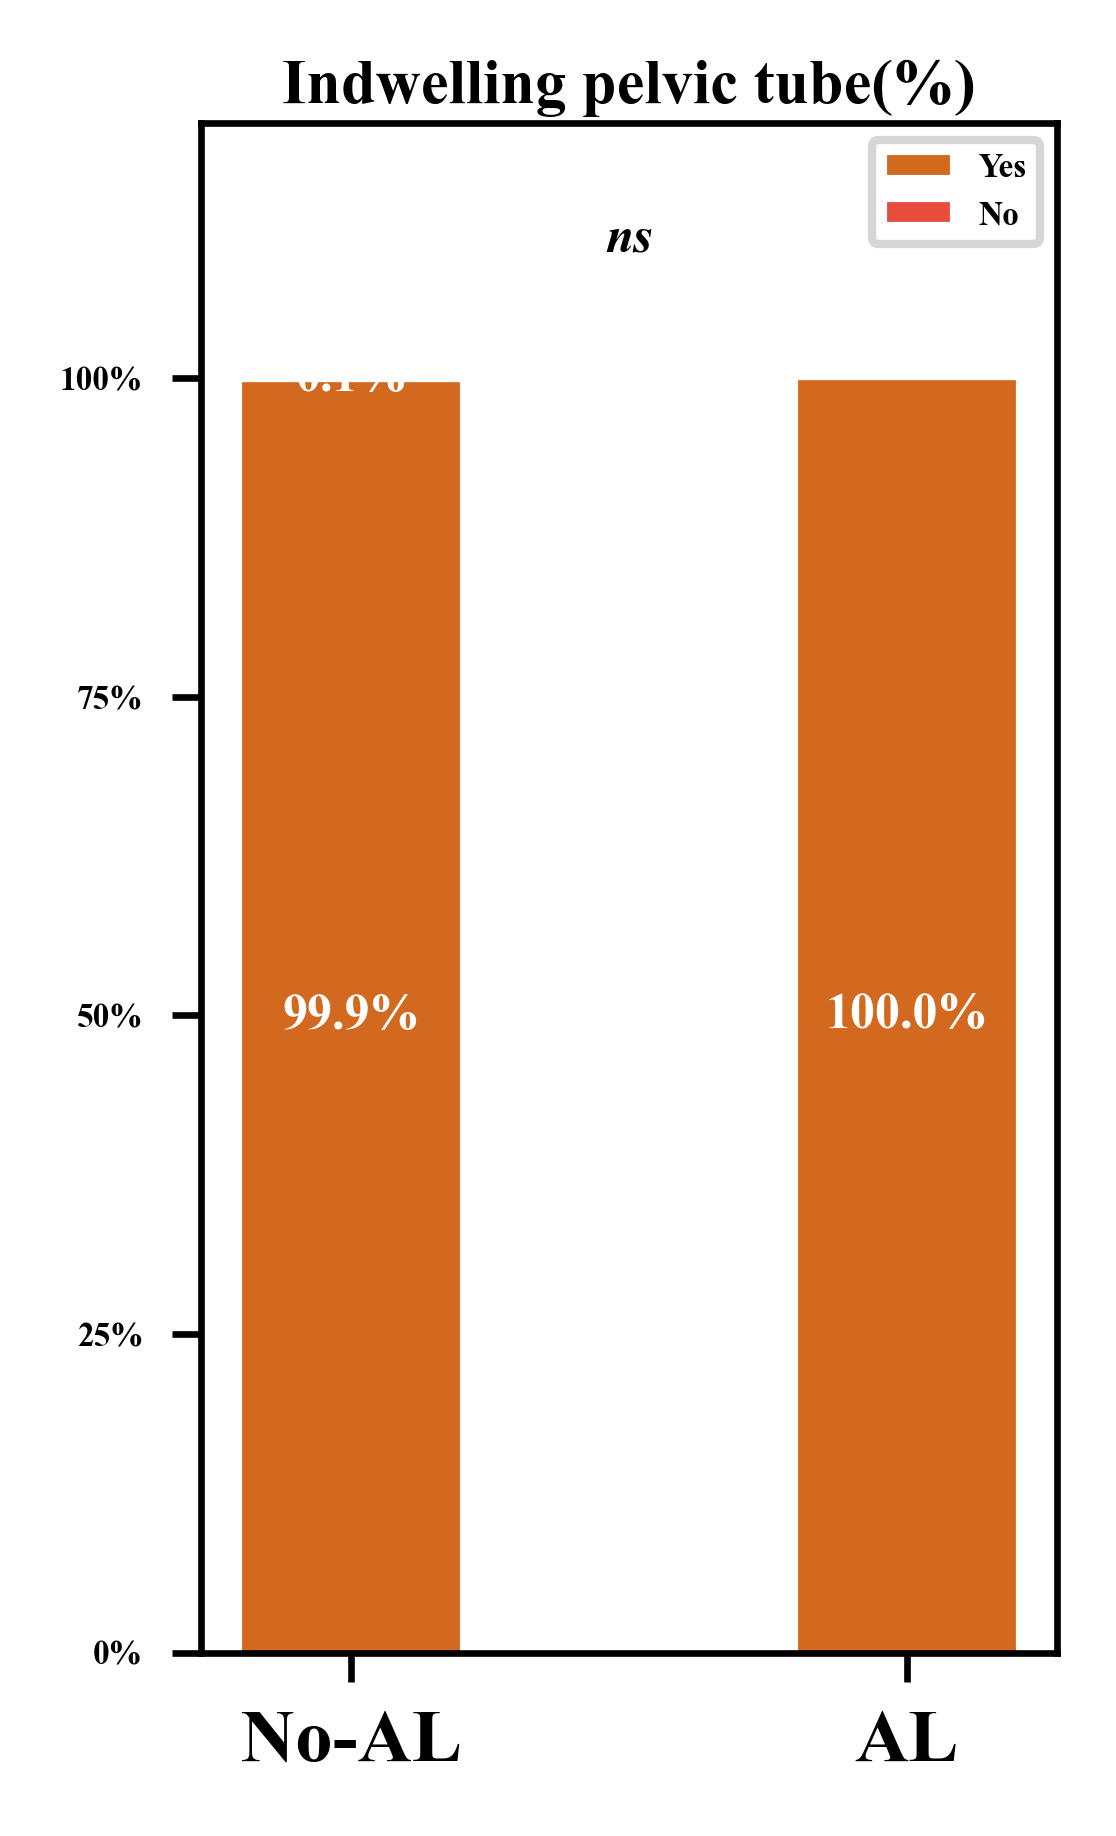

In [33]:
grouped = df.groupby(['al'])['yinliu'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)

for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Indwelling pelvic tube(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

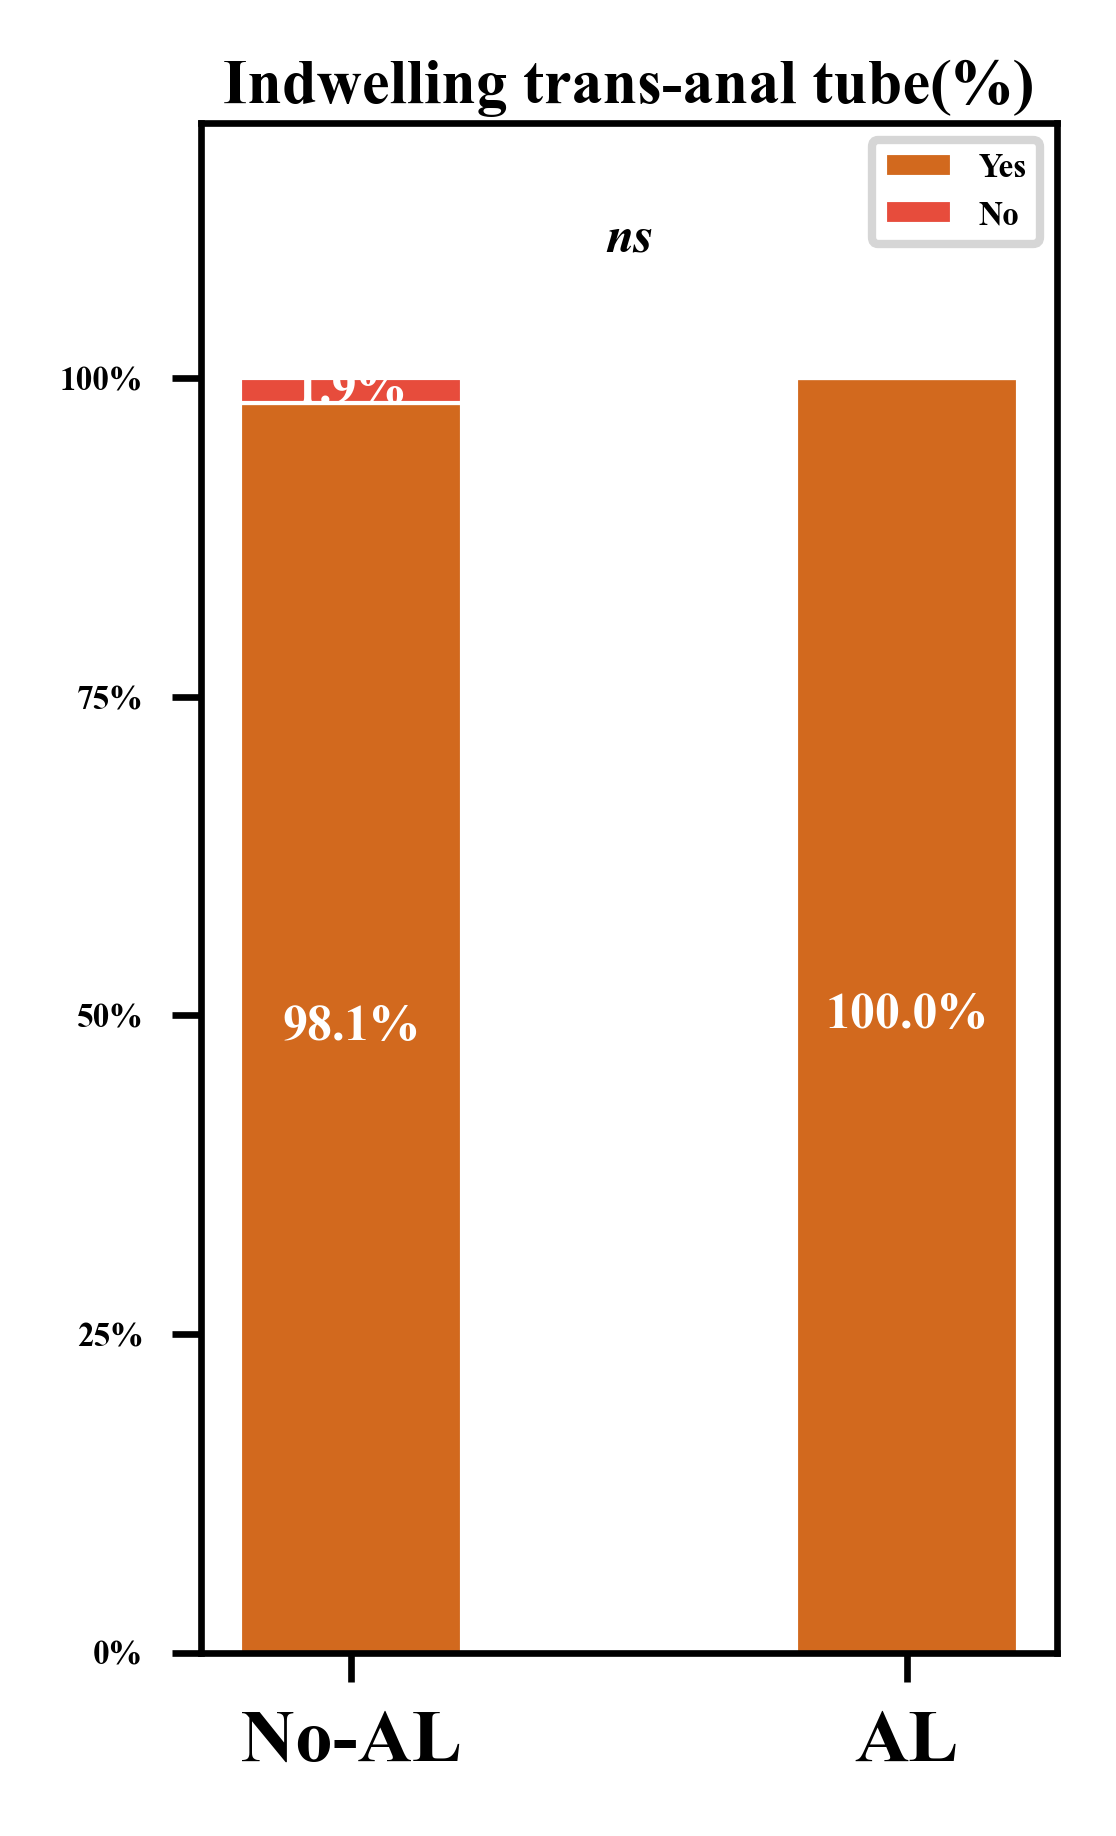

In [37]:
grouped = df.groupby(['al'])['gangguan'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='Yes', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 0] if 0 in grouped.columns and pd.notnull(grouped.loc[index, 0]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='No', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Indwelling trans-anal tube(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

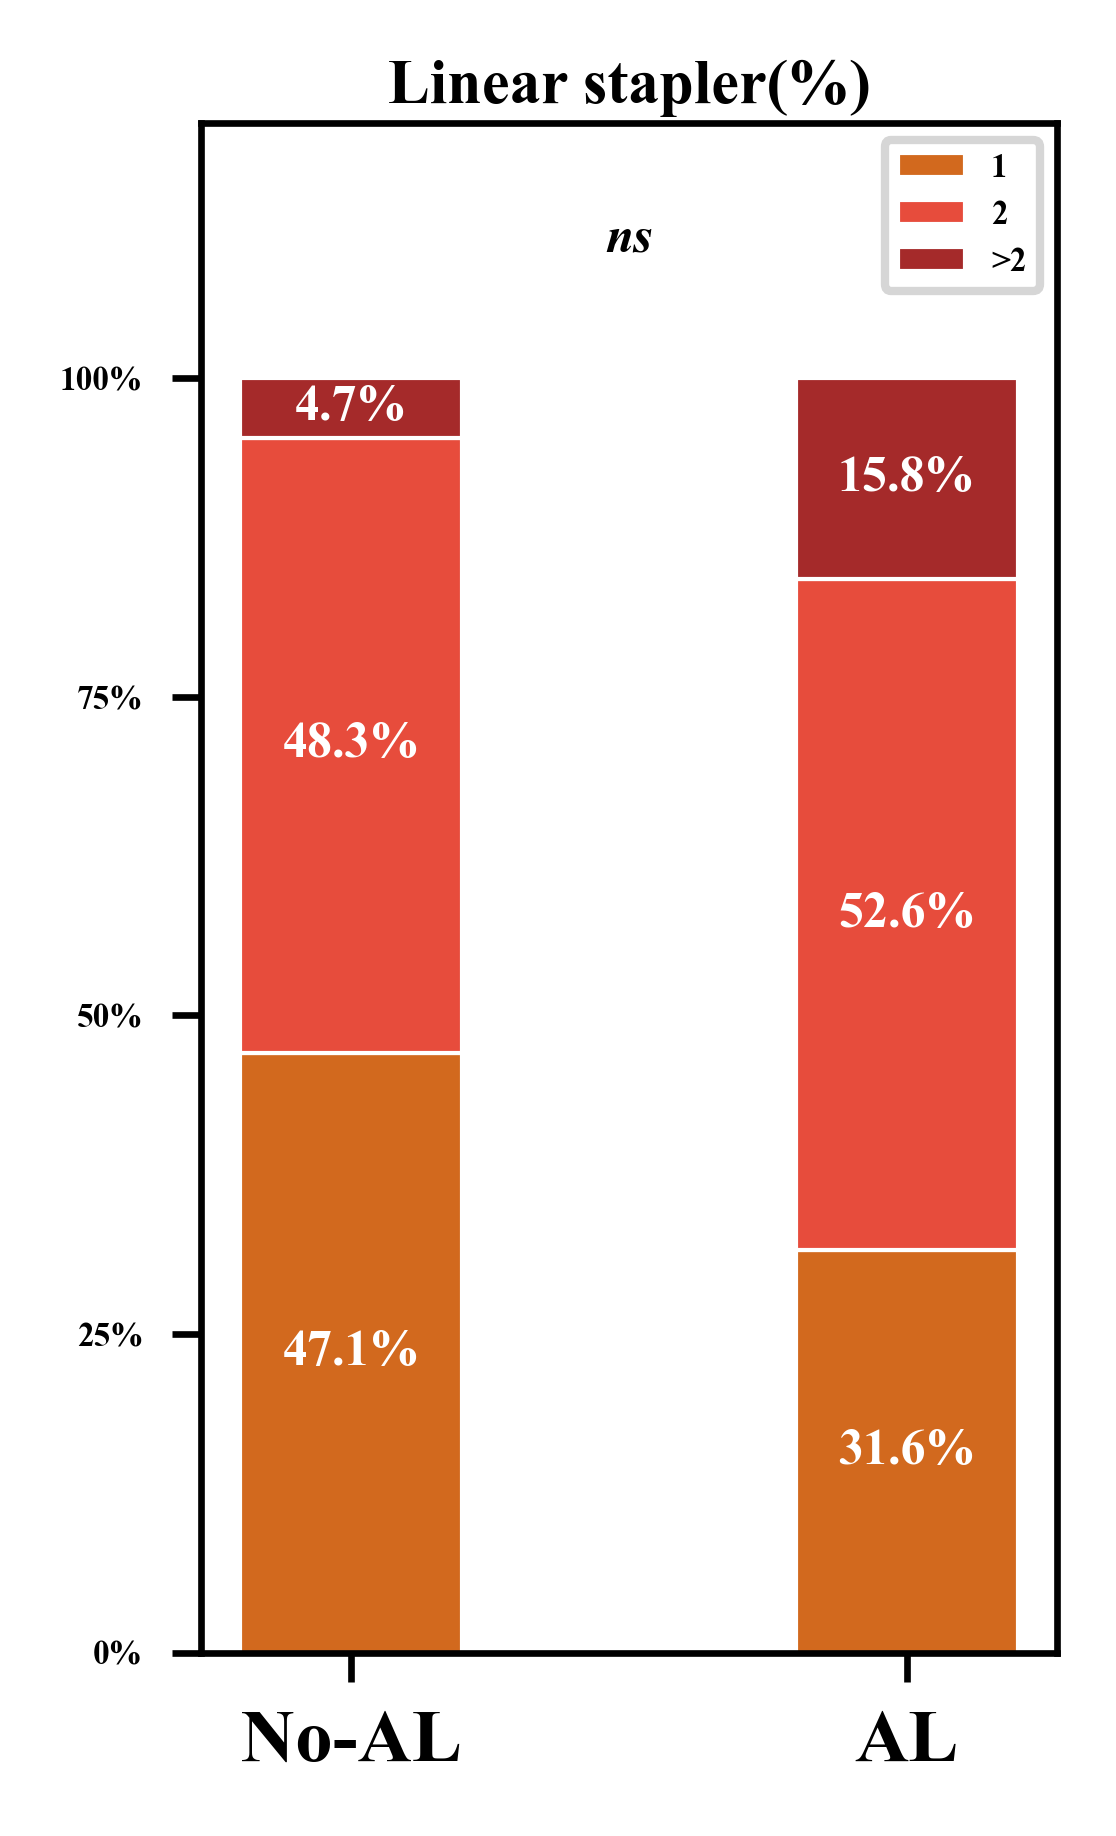

In [39]:
grouped = df.groupby(['al'])['bhq'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
sex_color = 'brown'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='1', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 2] if 2 in grouped.columns and pd.notnull(grouped.loc[index, 2]) else 0)

plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='2', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + female_heights[j] for j in range(len(x_positions))]
sex_heights = []
for index in grouped.index:
    sex_heights.append(grouped.loc[index, 3] if 3 in grouped.columns and pd.notnull(grouped.loc[index, 3]) else 0)
plt.bar(x_positions, sex_heights, width, bottom=bottom, 
        color=sex_color, label='>2', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if sex_heights[j] > 0:
        plt.text(pos, bottom[j] + sex_heights[j]/2, 
                f'{sex_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Linear stapler(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

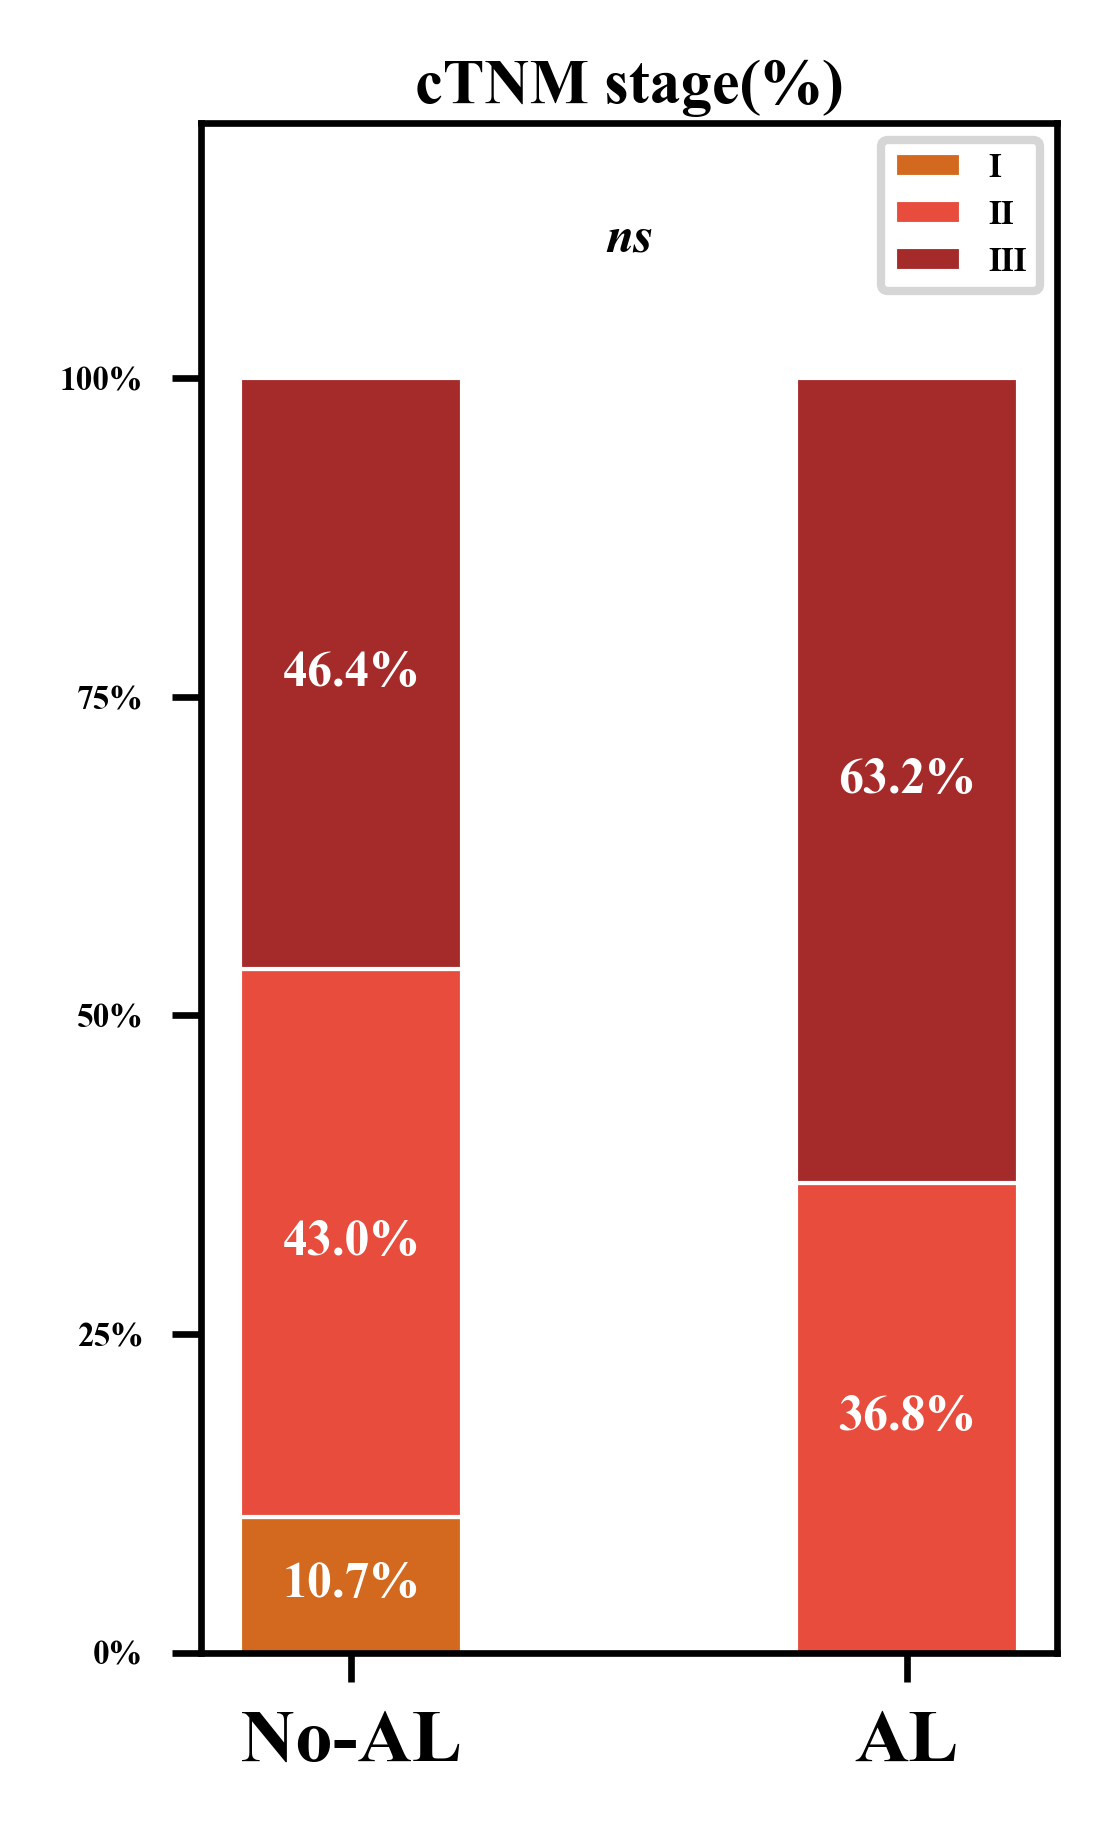

In [41]:
grouped = df.groupby(['al'])['stagebz'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
sex_color = 'brown'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='I', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 2] if 2 in grouped.columns and pd.notnull(grouped.loc[index, 2]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='II', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + female_heights[j] for j in range(len(x_positions))]
sex_heights = []
for index in grouped.index:
    sex_heights.append(grouped.loc[index, 3] if 3 in grouped.columns and pd.notnull(grouped.loc[index, 3]) else 0)

plt.bar(x_positions, sex_heights, width, bottom=bottom, 
        color=sex_color, label='III', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if sex_heights[j] > 0:
        plt.text(pos, bottom[j] + sex_heights[j]/2, 
                f'{sex_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('cTNM stage(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

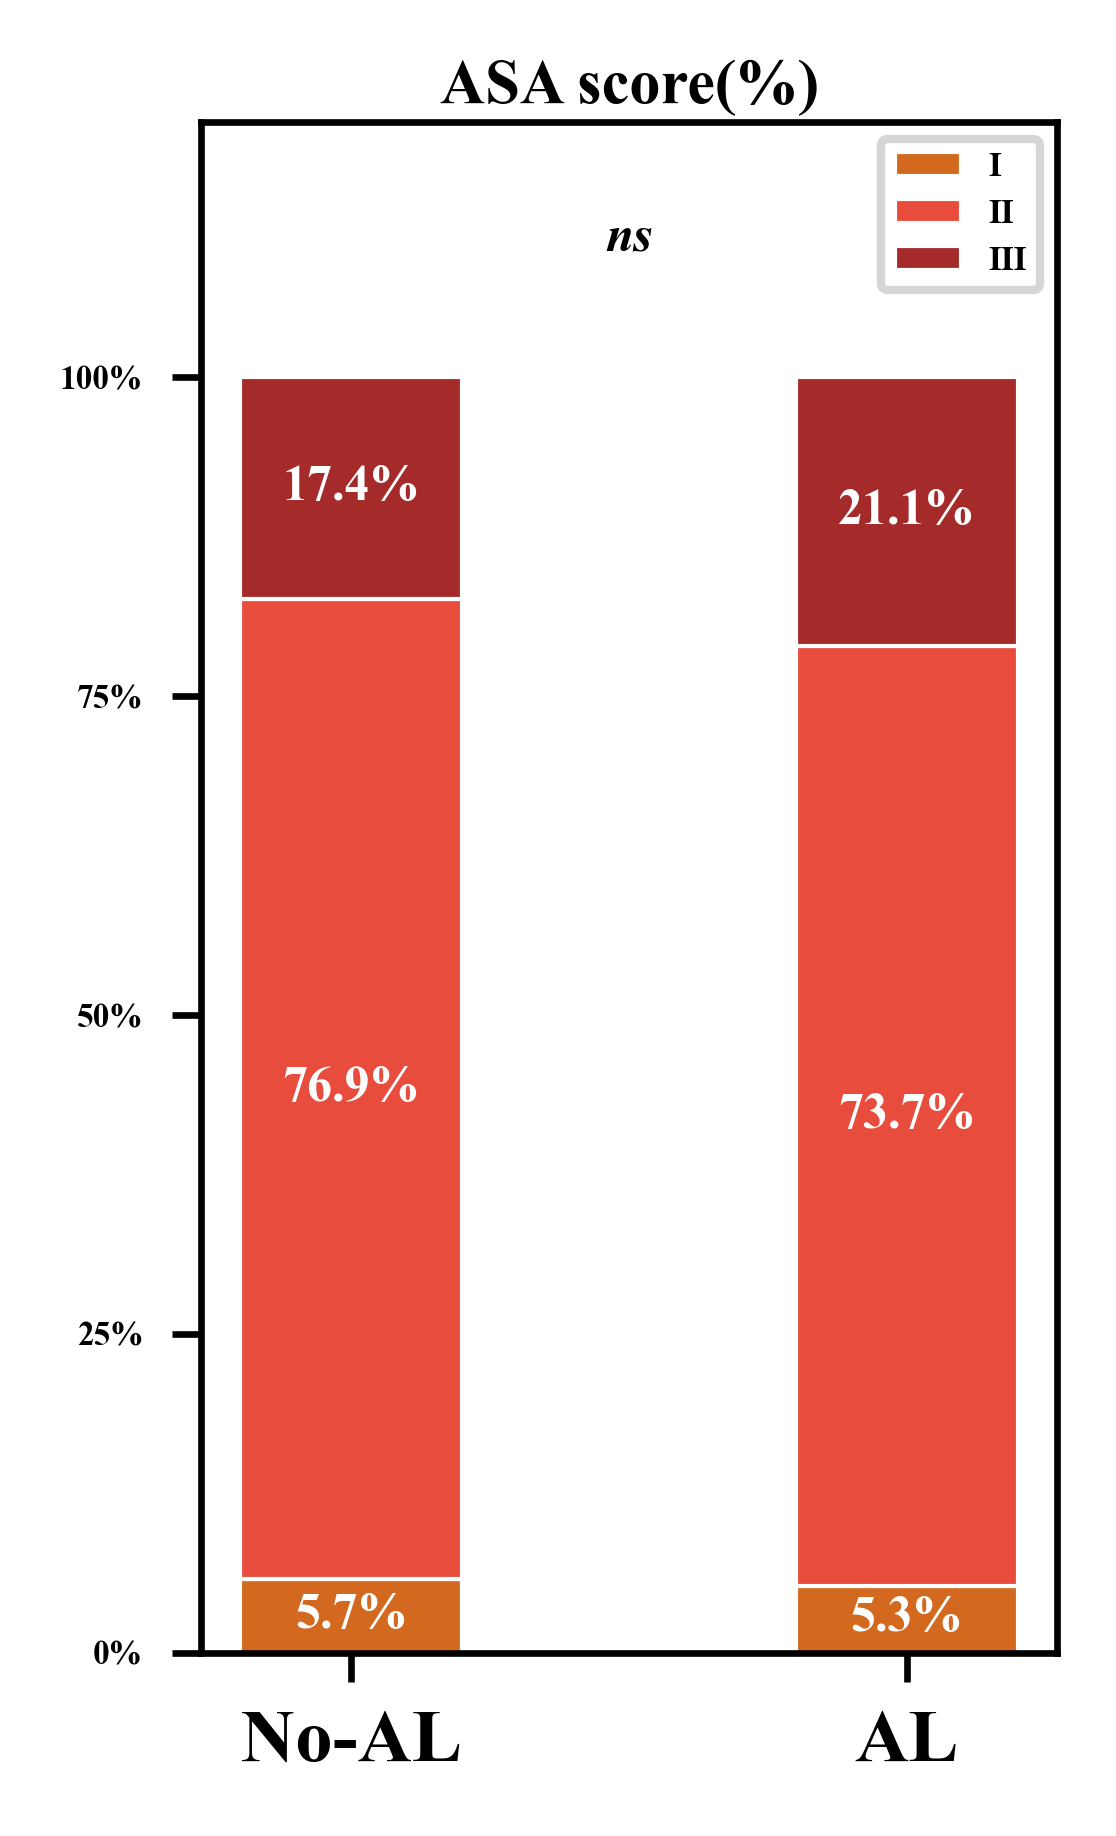

In [43]:
grouped = df.groupby(['al'])['asabz'].value_counts(normalize=True).unstack()
plt.figure(figsize=(1.8, 3), dpi=600)
male_color = 'chocolate'  
female_color = '#e74c3c'  
sex_color = 'brown'  
x_positions = [0, 0.5]
width = 0.2
bottom = [0] * len(x_positions)
male_heights = []
for index in grouped.index:
    male_heights.append(grouped.loc[index, 1] if 1 in grouped.columns and pd.notnull(grouped.loc[index, 1]) else 0)
plt.bar(x_positions, male_heights, width, bottom=bottom, 
        color=male_color, label='I', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if male_heights[j] > 0:
        plt.text(pos, bottom[j] + male_heights[j]/2, 
                f'{male_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + male_heights[j] for j in range(len(x_positions))]
female_heights = []
for index in grouped.index:
    female_heights.append(grouped.loc[index, 2] if 2 in grouped.columns and pd.notnull(grouped.loc[index, 2]) else 0)
plt.bar(x_positions, female_heights, width, bottom=bottom, 
        color=female_color, label='II', edgecolor='white', linewidth=0.5)

for j, pos in enumerate(x_positions):
    if female_heights[j] > 0:
        plt.text(pos, bottom[j] + female_heights[j]/2, 
                f'{female_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
bottom = [bottom[j] + female_heights[j] for j in range(len(x_positions))]
sex_heights = []
for index in grouped.index:
    sex_heights.append(grouped.loc[index, 3] if 3 in grouped.columns and pd.notnull(grouped.loc[index, 3]) else 0)

plt.bar(x_positions, sex_heights, width, bottom=bottom, 
        color=sex_color, label='III', edgecolor='white', linewidth=0.5)
for j, pos in enumerate(x_positions):
    if sex_heights[j] > 0:
        plt.text(pos, bottom[j] + sex_heights[j]/2, 
                f'{sex_heights[j]*100:.1f}%', 
                ha='center', va='center', 
                fontsize=6, color='white', weight='bold')
plt.xticks(x_positions, ['No-AL', 'AL'], fontname='Times New Roman', fontsize=9, weight='bold')
plt.ylim(0, 1.2)
plt.yticks([0, 0.25, 0.5, 0.75, 1], 
           ['0%', '25%', '50%', '75%', '100%'],
           fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('ASA score(%)',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.legend(prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 4})
plt.text(0.25, 1.1,'ns', ha='center', fontsize=6,fontproperties = 'Times New Roman',fontstyle='italic')
plt.tight_layout(pad=0.5)
plt.show()

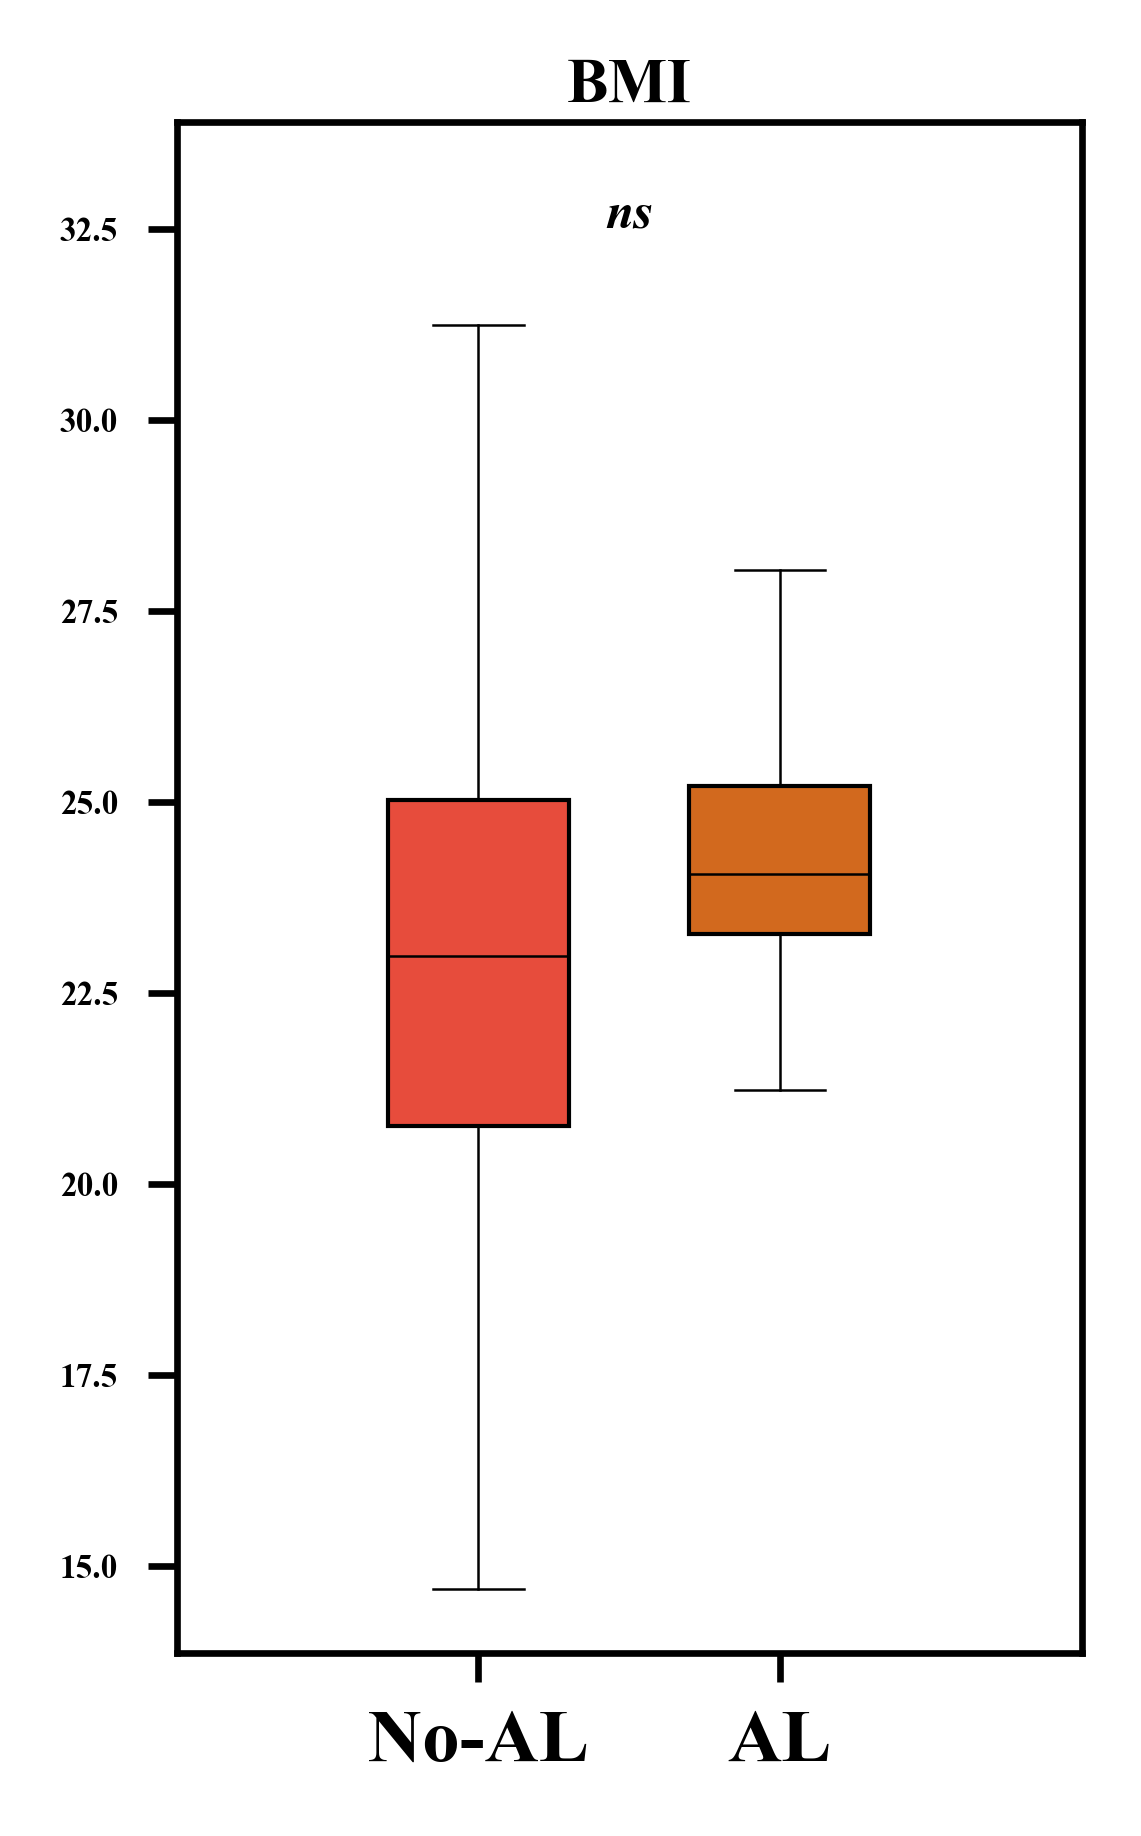

In [45]:
continuous_var = 'bmibz'  
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate'] 
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.3)
plt.xticks(x_positions, group_labels, fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('BMI',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
fig = plt.gcf()
ax = plt.gca()
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min
distance = y_range * 0.025
text_y = y_max + distance
plt.text(0.25, text_y, 'ns', ha='center', fontsize=6, fontproperties='Times New Roman', fontstyle='italic')
ax.set_ylim(y_min, y_max + y_range * 0.1)
plt.tight_layout(pad=0.5)
plt.show()

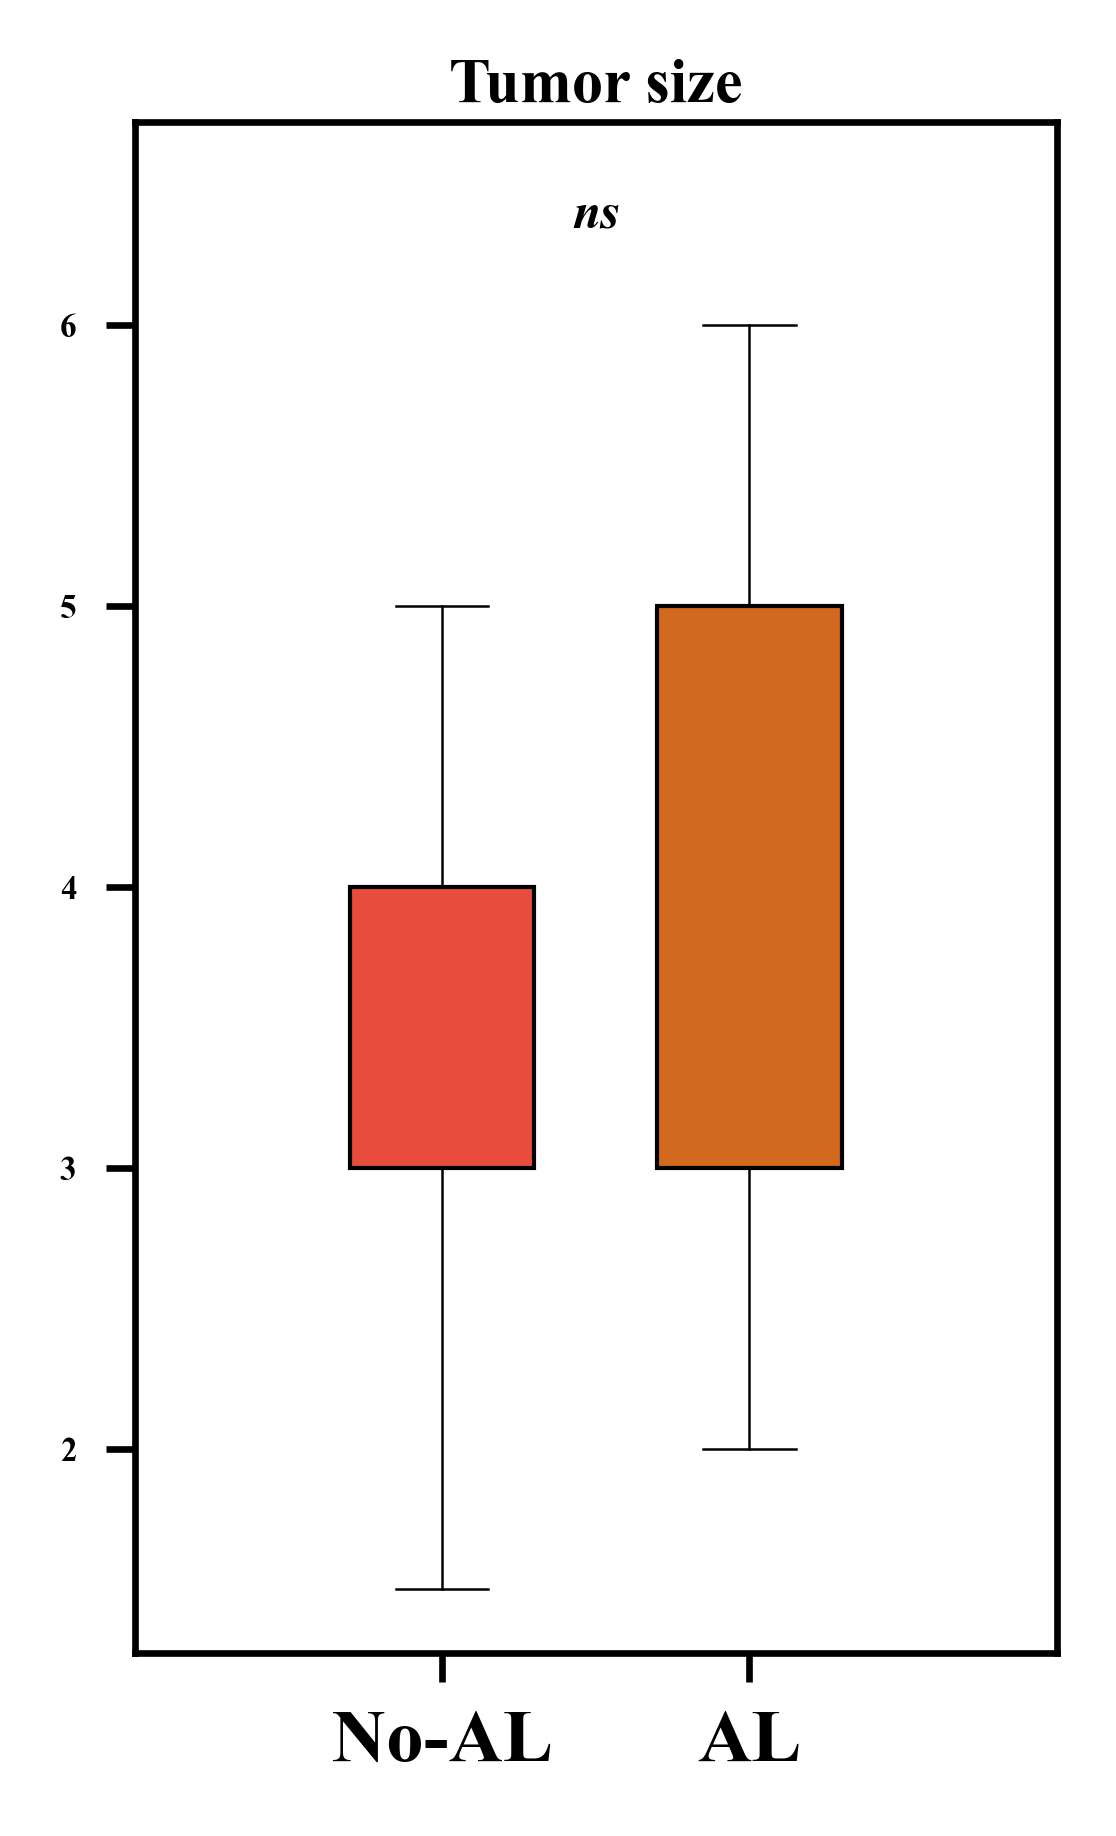

In [49]:
continuous_var = 'sizebz'  
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate'] 
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.3)
plt.xticks(x_positions, group_labels, fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Tumor size',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
fig = plt.gcf()
ax = plt.gca()
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min
distance = y_range * 0.025
text_y = y_max + distance
plt.text(0.25, text_y, 'ns', ha='center', fontsize=6, fontproperties='Times New Roman', fontstyle='italic')
ax.set_ylim(y_min, y_max + y_range * 0.1)
plt.tight_layout(pad=0.5)
plt.show()

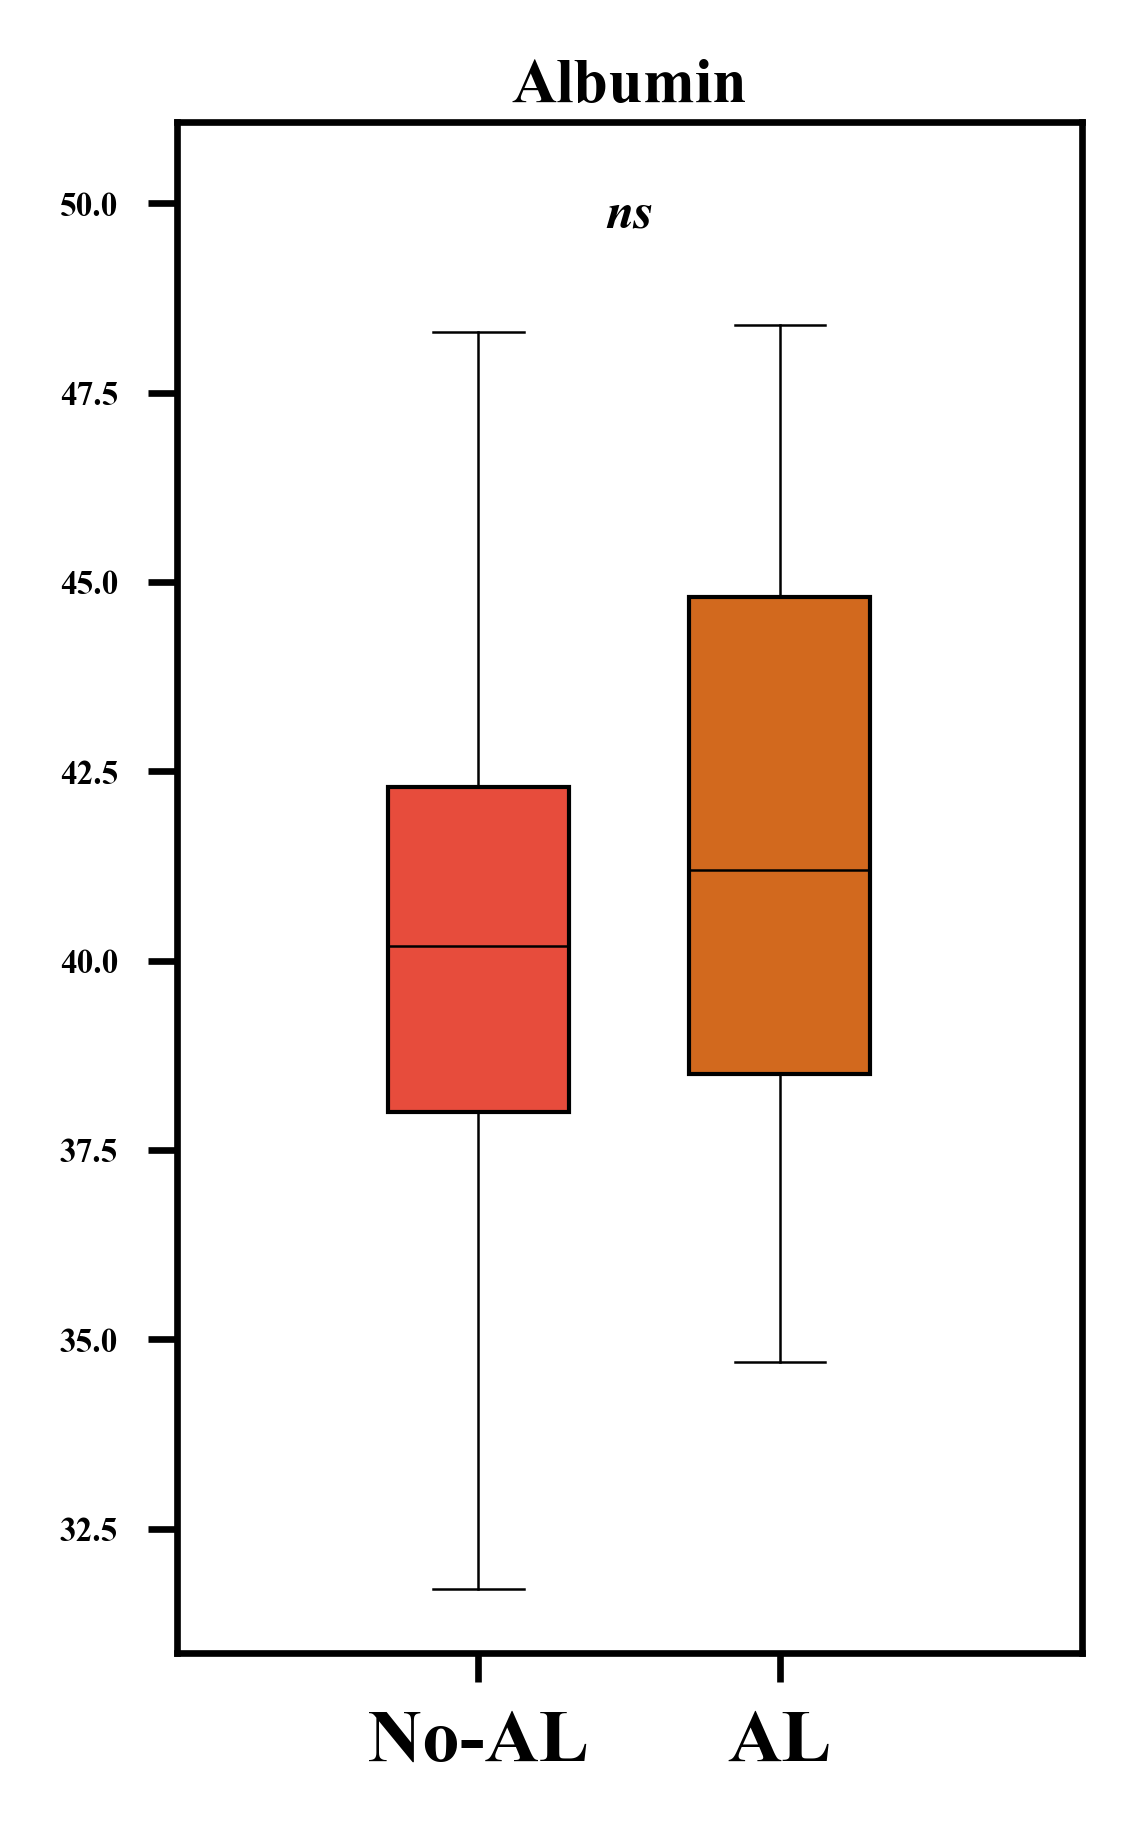

In [51]:
continuous_var = 'alb'  
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate'] 
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.3)
plt.xticks(x_positions, group_labels, 
          fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Albumin',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
fig = plt.gcf()
ax = plt.gca()
y_min, y_max = ax.get_ylim()
y_range = y_max - y_min
distance = y_range * 0.025
text_y = y_max + distance
plt.text(0.25, text_y, 'ns', ha='center', fontsize=6, fontproperties='Times New Roman', fontstyle='italic')
ax.set_ylim(y_min, y_max + y_range * 0.1)
plt.tight_layout(pad=0.5)
plt.show()

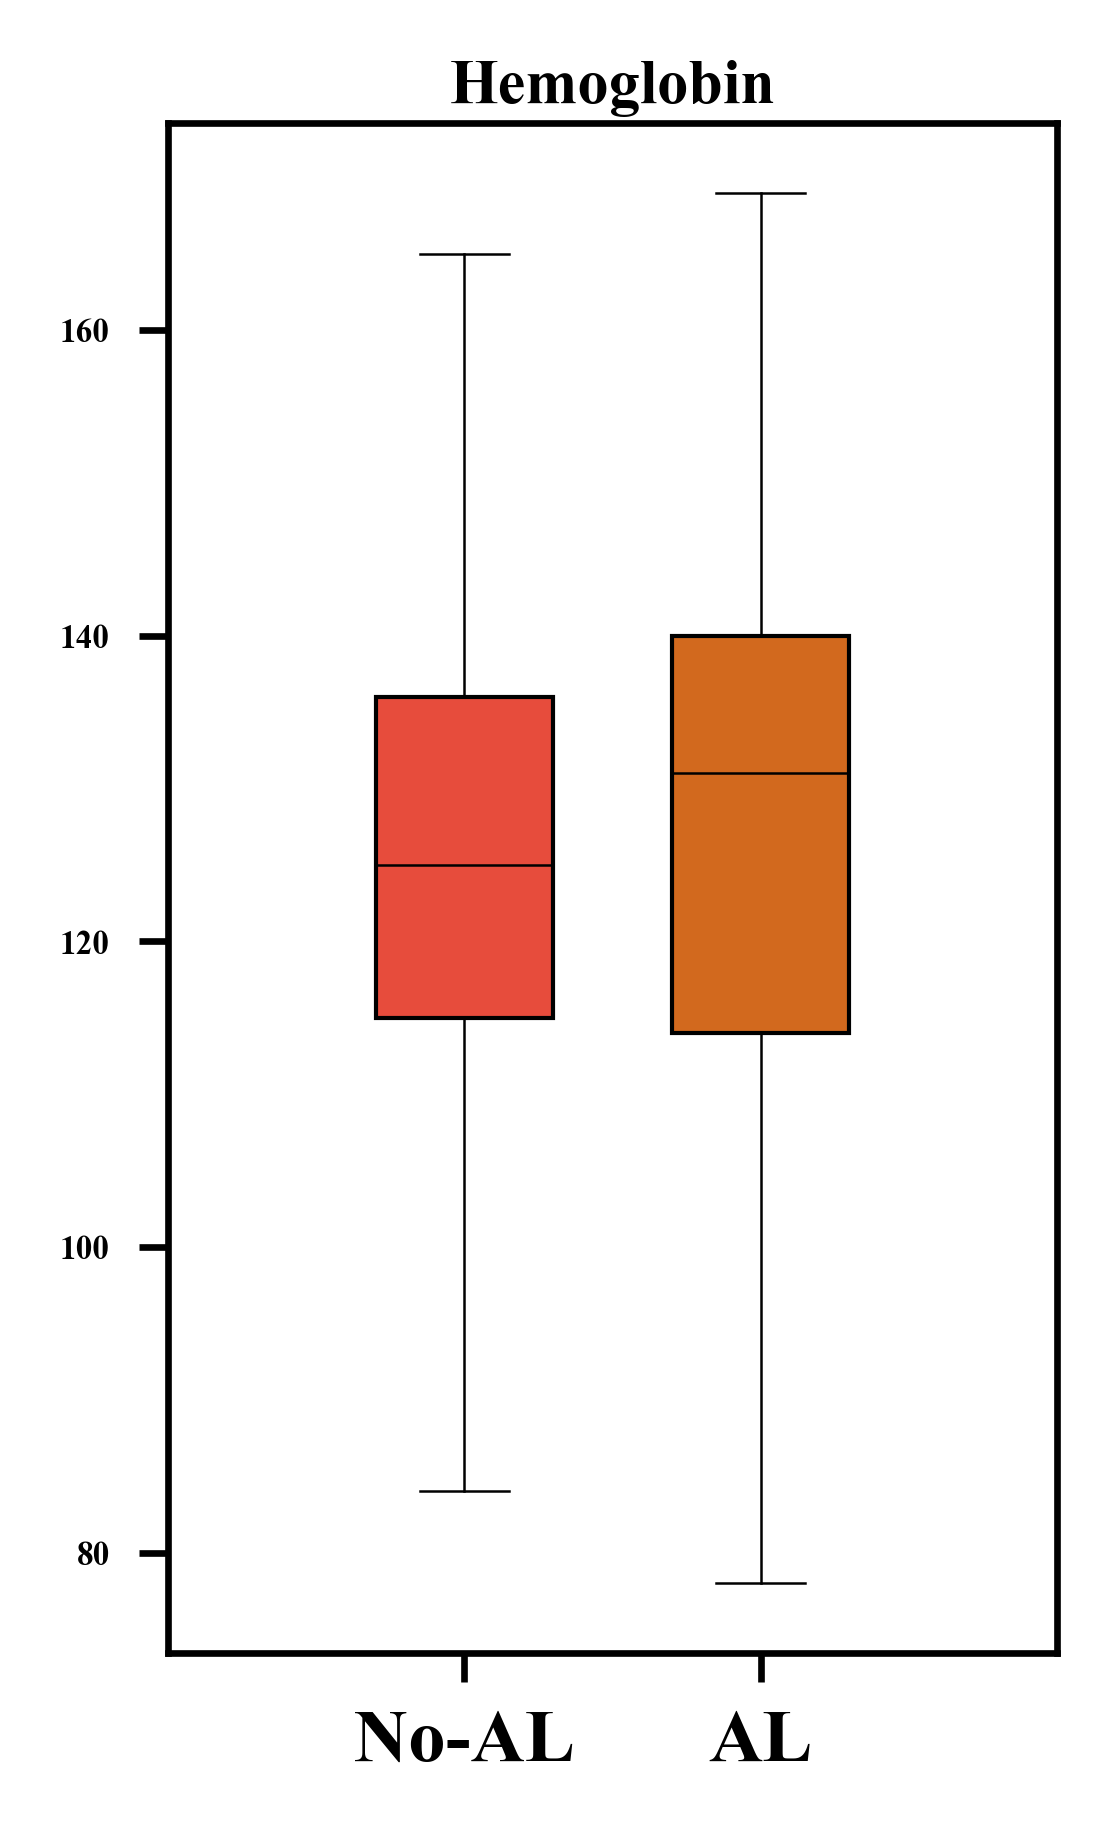

In [53]:
continuous_var = 'hb'  
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate'] 
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.3)
plt.xticks(x_positions, group_labels, 
          fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Hemoglobin',  fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.tight_layout(pad=0.5)
plt.show()

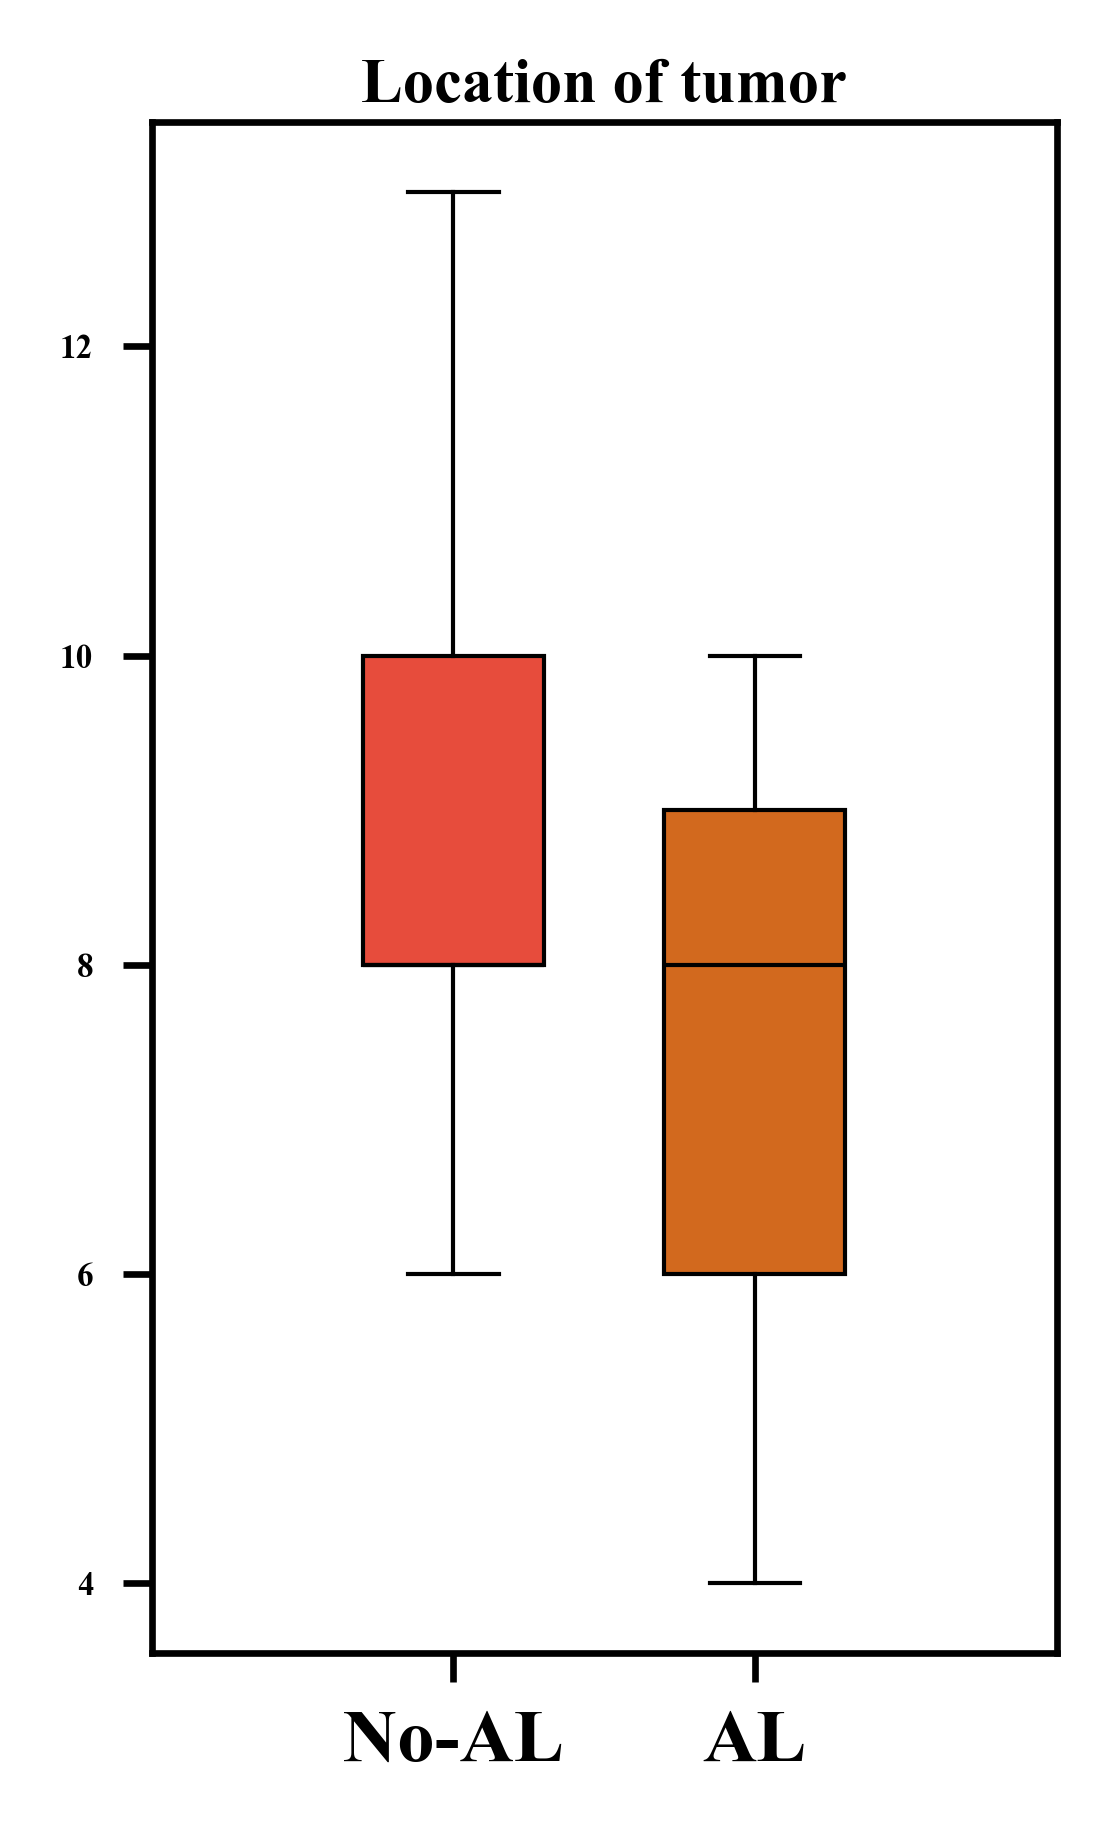

In [55]:
continuous_var = 'dist'  
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate']  
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.5)
plt.xticks(x_positions, group_labels, 
          fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Location of tumor', fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.tight_layout(pad=0.5)
plt.show()

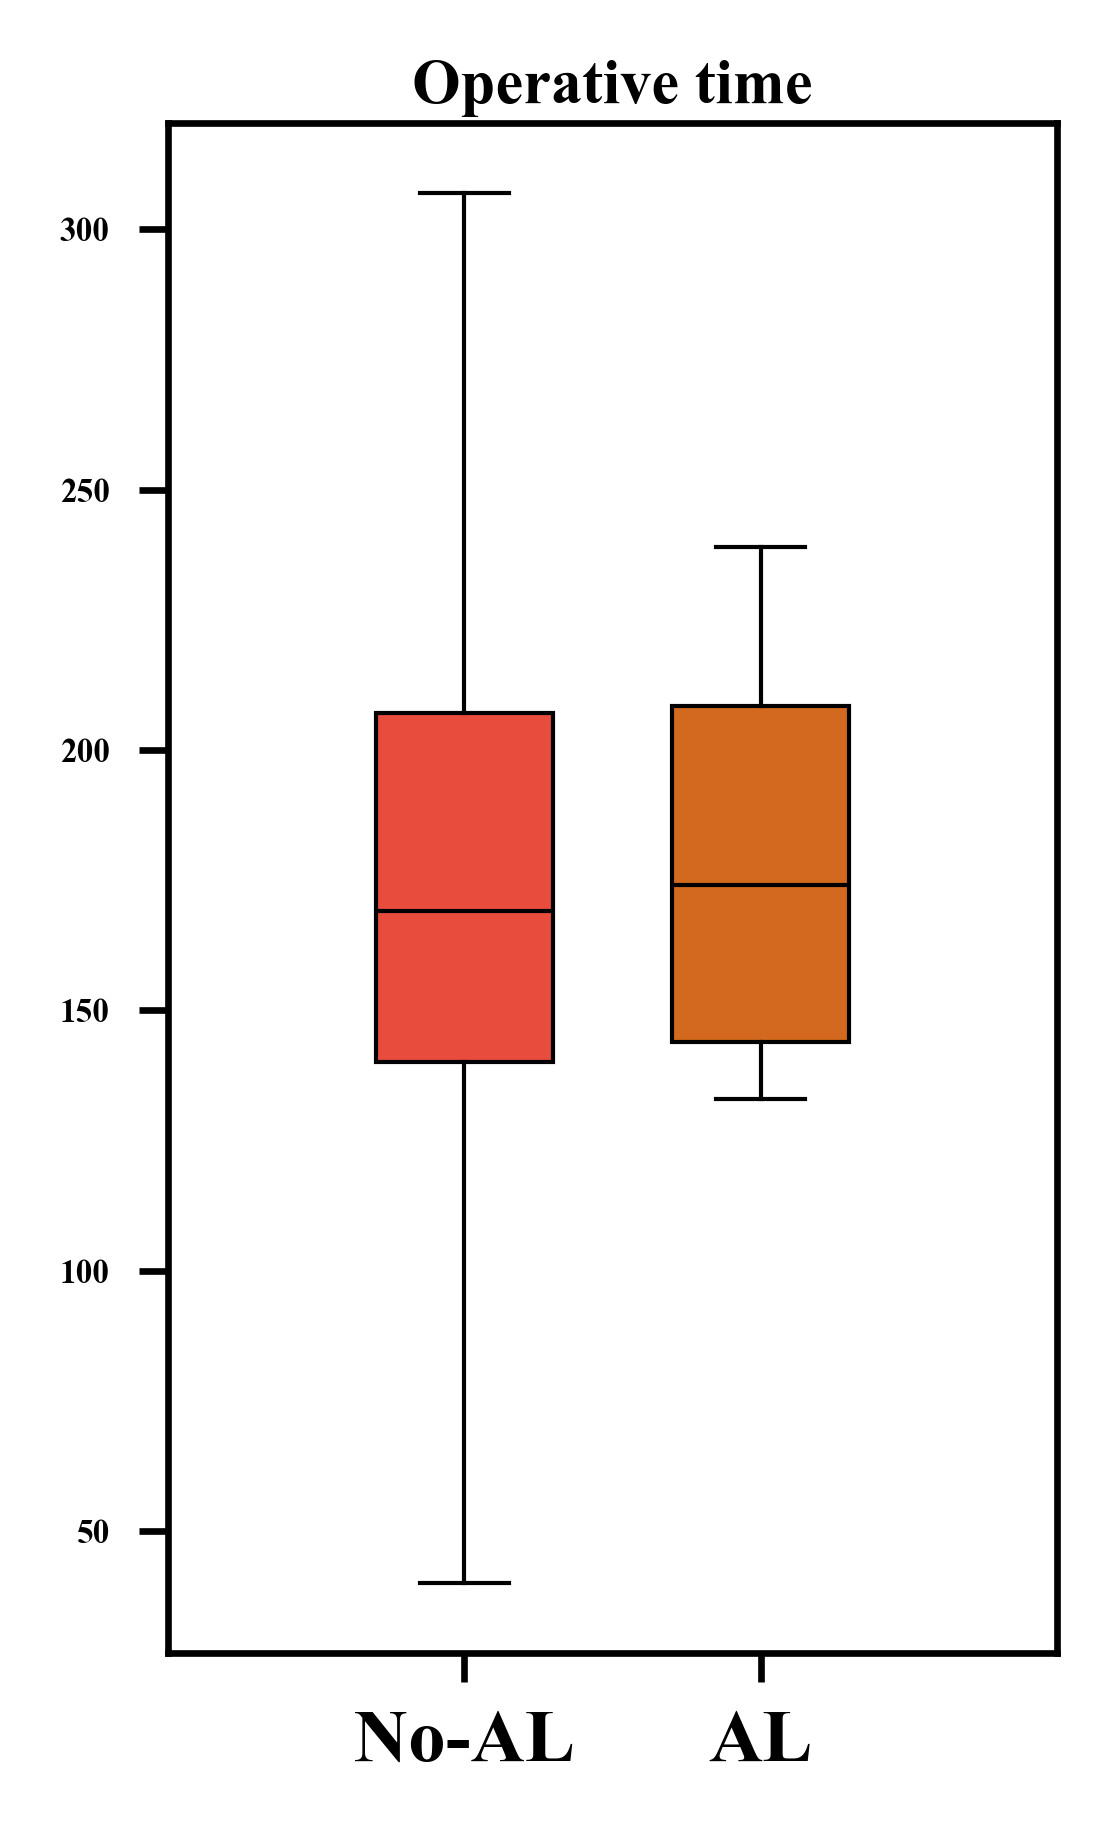

In [57]:
continuous_var = 'timebz' 
plt.figure(figsize=(1.8, 3), dpi=600)
box_colors = ['#e74c3c', 'chocolate'] 
x_positions = [0, 0.5]
group_labels = ['No-AL', 'AL']
data_to_plot = []
for al_val, sub_df in df.groupby('al'):
    data_to_plot.append(sub_df[continuous_var].dropna().values)
box = plt.boxplot(data_to_plot, positions=x_positions, widths=0.3, patch_artist=True, showfliers=False)
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
for element in ['whiskers', 'caps', 'medians', 'fliers']:
    plt.setp(box[element], color='black', linewidth=0.5)
plt.xticks(x_positions, group_labels, 
          fontname='Times New Roman', fontsize=9, weight='bold')
plt.yticks(fontname='Times New Roman', fontsize=4, weight='bold')
plt.title('Operative time', fontname='Times New Roman', fontsize=7.5, weight='bold', pad=2.5)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
Figure 4c

<Figure size 7200x6000 with 0 Axes>

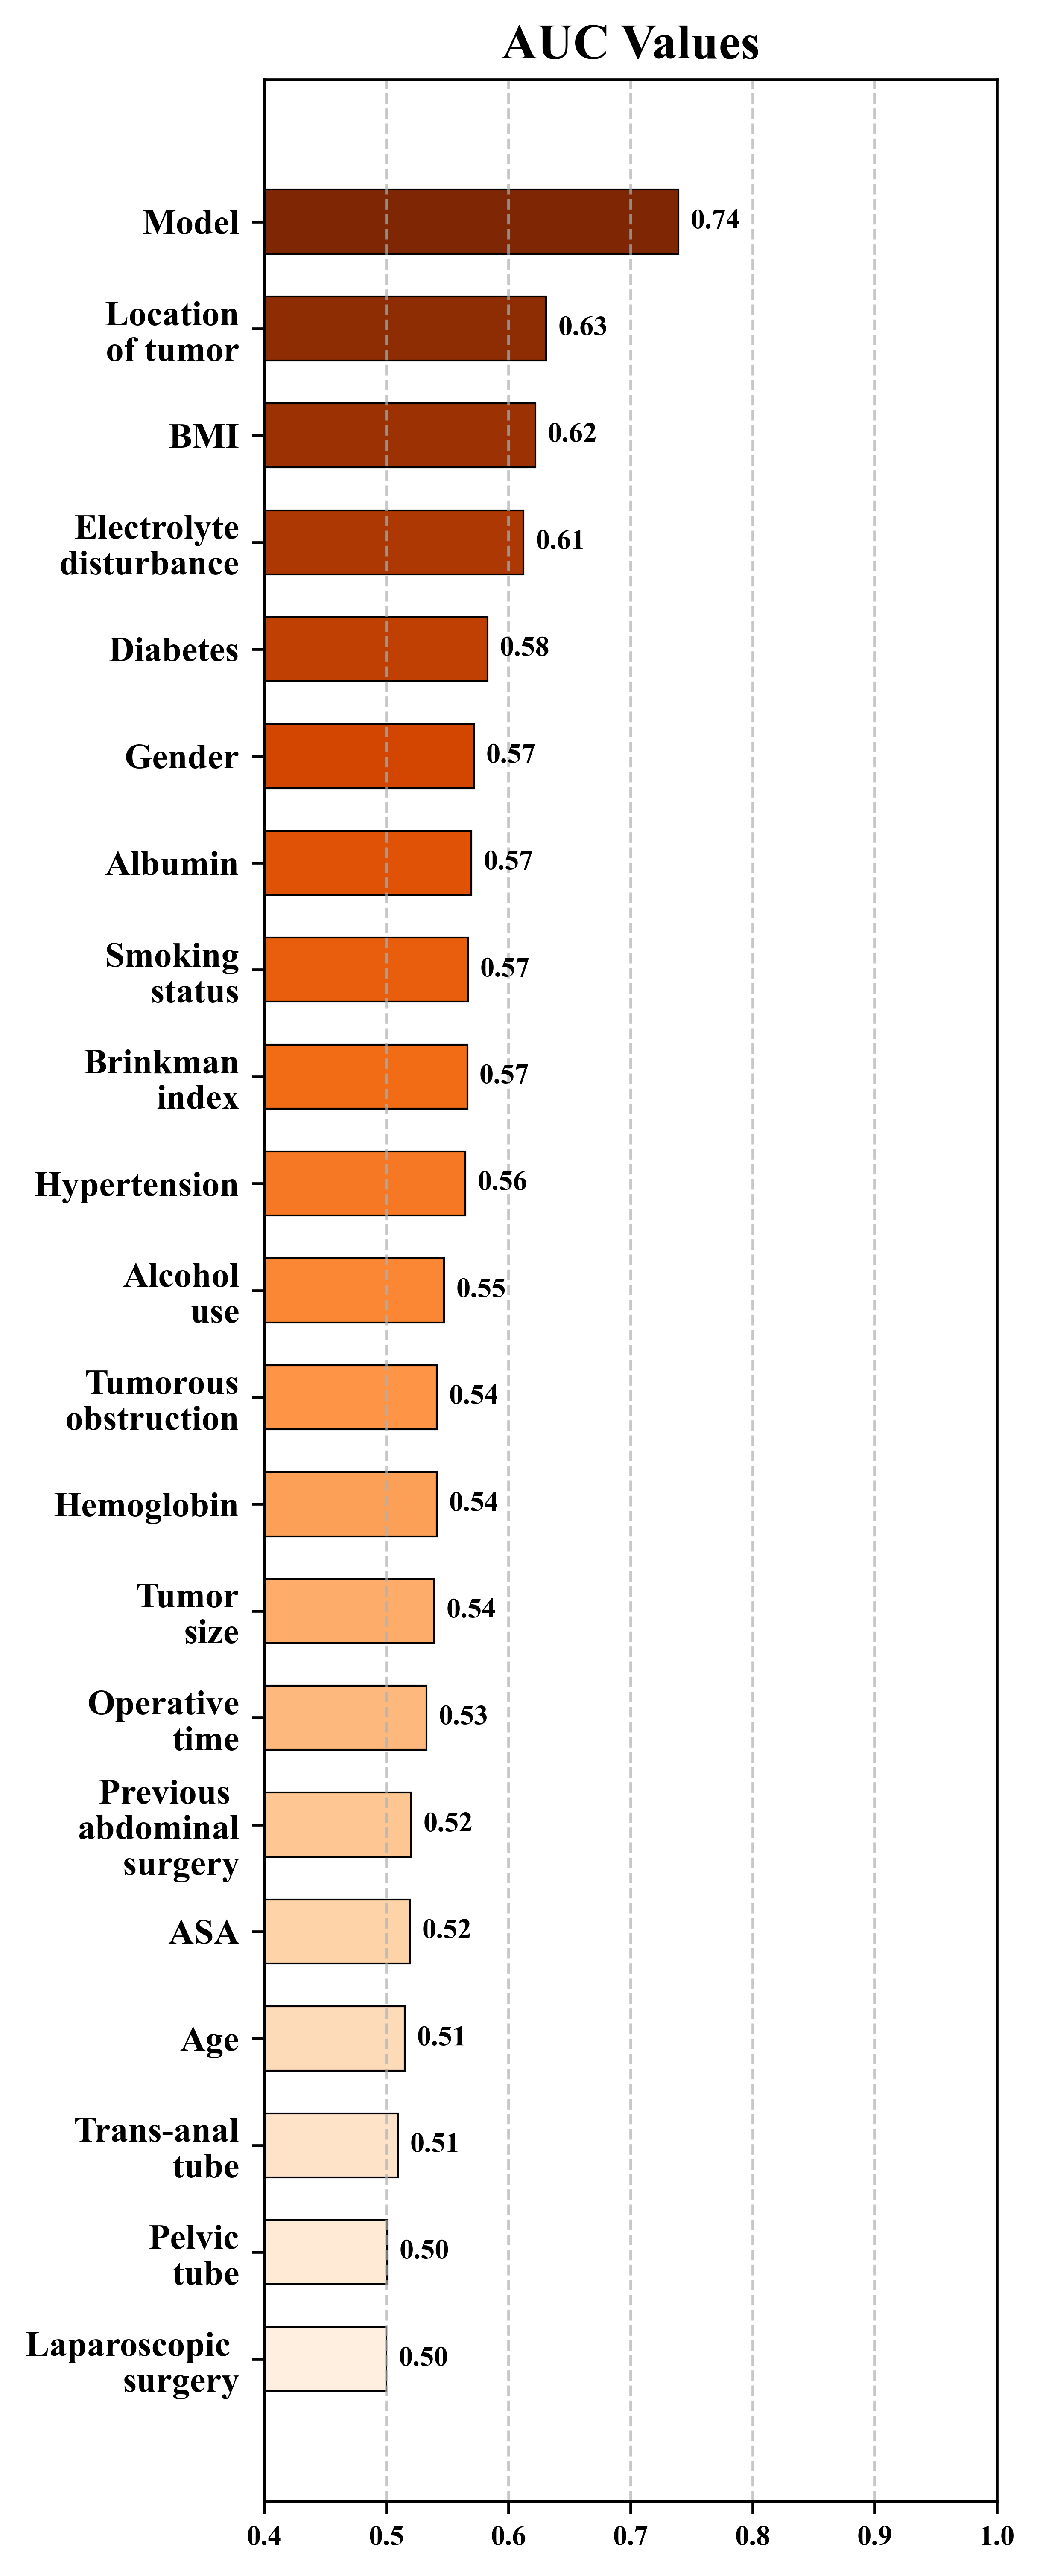

In [69]:
from sklearn.metrics import roc_curve, auc 
import numpy as np
df = pd.read_excel(r"overalldata.xlsx", sheet_name='Sheet1')
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10), dpi=600)
X = df.drop(['al', 'id','stoma', 'prediction'], axis=1)
y = df['al']
y1 = df['proba']
custom_labels = {
    'proba':'Model',
    'gender': 'Gender',
    'agebz': 'Age',
    'bmibz': 'BMI',
    'bindex': 'Brinkman\nindex',
    'smoke': 'Smoking\nstatus',
    'drink': 'Alcohol\nuse',
    'hyper': 'Hypertension',
    'dia': 'Diabetes',
    'sur': 'Previous \nabdominal\n surgery',
    'asabz': ' ASA',
    'hb': 'Hemoglobin',
    'alb': 'Albumin',
    'electrolyte': 'Electrolyte\ndisturbance',
    'sizebz': 'Tumor\nsize',
    'obstruction': 'Tumorous\nobstruction',
    'dist': ' Location\nof tumor',
    'stagebz': 'cStage',
    'gangguan': 'Trans-anal\ntube',
    'yinliu': 'Pelvic\ntube',
    'type': 'Laparoscopic \nsurgery',
    'timebz': 'Operative\ntime',
    'bhq': 'Linear\nstaplersr'
}

def calculate_auc_ci(y_true, y_score, n_bootstraps=100, seed=2025):
    rng = np.random.RandomState(seed)
    bootstrapped_scores = []
    for i in range(n_bootstraps):
        indices = rng.randint(0, len(y_score), len(y_score))
        if len(np.unique(y_true[indices])) < 2:
            continue）
        fpr, tpr, _ = roc_curve(y_true[indices], y_score[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    lower_ci = sorted_scores[int(0.025 * len(sorted_scores))]
    upper_ci = sorted_scores[int(0.975 * len(sorted_scores))]
    return lower_ci, upper_ci
auc_values = []
for feature in X.columns:
    X_feature = X[feature].values
    fpr, tpr, thresholds = roc_curve(y, X_feature)
    roc_auc = auc(fpr, tpr) 
    if roc_auc < 0.5:
        X_feature = -X_feature
        fpr, tpr, thresholds = roc_curve(y, X_feature)
        roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

feature_names = list(X.columns) + ['Model']
feature_labels = [custom_labels.get(f, f) for f in feature_names]
sorted_indices = np.argsort(auc_values)[::-1]
sorted_features = [feature_labels[i] for i in sorted_indices]
sorted_auc = [auc_values[i] for i in sorted_indices]
cmap = plt.get_cmap('Oranges_r')
colors = [cmap(i / len(sorted_auc)) for i in range(len(sorted_auc))]
plt.figure(figsize=(4, 10), dpi=600)
y_pos = np.arange(len(sorted_features))
plt.barh(y_pos, sorted_auc, height=0.6, color=colors, edgecolor='black', linewidth=0.5)
for i, (auc, lower, upper) in enumerate(zip(sorted_auc, sorted_lower, sorted_upper)):
    plt.text(auc + 0.01, i, f'{auc:.2f}', 
             va='center', fontweight='bold', fontsize=8)
plt.xlim([0.4, 1.0])  
plt.title('AUC Values', weight='bold', fontsize=14)
plt.xticks(rotation=0, fontsize=8, weight='bold')
plt.yticks(y_pos, sorted_features, fontsize=10, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout(pad=0.5)
plt.show()